# Esquema para una Super-Plantilla DW (Ultra-bright)

## 1. Cargar librerías necesarias

In [1]:
# librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_profiling import ProfileReport

In [2]:

# ! pip install xlrd

In [2]:
# ajustes para ver mejor todo:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.3f}'.format)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',None)
# por si nos hace falta matplotlib
%matplotlib inline

## 2. Cargar el dataset

In [4]:
df = pd.read_csv("./mascotas/train.csv")
df.set_index('Name',inplace=True)
df

Type            Name  Age  Breed1  Breed2  Gender  Color1  Color2  \
0         2          Nibble    3     299       0       1       1       7   
1         2     No Name Yet    1     265       0       1       1       2   
2         1          Brisco    1     307       0       1       2       7   
3         1            Miko    4     307       0       2       1       2   
4         1          Hunter    1     307       0       1       1       0   
...     ...             ...  ...     ...     ...     ...     ...     ...   
14988     2             NaN    2     266       0       3       1       0   
14989     2  Serato & Eddie   60     265     264       3       1       4   
14990     2         Monkies    2     265     266       3       5       6   
14991     2         Ms Daym    9     266       0       2       4       7   
14992     1            Fili    1     307     307       1       2       0   

       Color3  MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  \
0           0             1          1           2         2           2   
1           0             2          2           3         3           3   
2           0             2          2           1         1           2   
3           0             2          1           1         1           2   
4           0             2          1           2         2           2   
...       ...           ...        ...         ...       ...         ...   
14988       0             2          2           2         2           2   
14989       7             2          2           1         1           1   
14990       7             3          2           2         1           3   
14991       0             1          1           1         1           1   
14992       0             2          1           2         2           2   

       Health  Quantity  Fee  State                         RescuerID  \
0           1         1  100  41326  8480853f516546f6cf33aa88cd76c379   
1           1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14   
2           1         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb   
3           1         1  150  41401  9238e4f44c71a75282e62f7136c6b240   
4           1         1    0  41326  95481e953f8aed9ec3d16fc4509537e8   
...       ...       ...  ...    ...                               ...   
14988       1         4    0  41326  61c84bd7bcb6fb31d2d480b1bcf9682e   
14989       1         2    0  41326  1d5096c4a5e159a3b750c5cfcf6ceabf   
14990       1         5   30  41326  6f40a7acfad5cc0bb3e44591ea446c05   
14991       1         1    0  41336  c311c0c569245baa147d91fa4e351ae4   
14992       1         1    0  41332  9ed1d5493d223eaa5024c1a031dbc9c2   

       VideoAmt  \
0             0   
1             0   
2             0   
3             0   
4             0   
...         ...   
14988         0   
14989         0   
14990         0   
14991         0   
14992         0   

                                                                                                                                                                                                                                                                                                                                                                                                        Description  \
0                                           Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.   
1                                                                                                                                                                                                                                                                    

In [5]:
#df[df['Name']=="A. Sánchez"]

### 2.1. Si falla la carga, utilizar chardet para la codificación correcta del dataset

### 2.2. En caso de tener muchos ficheros a cargar

## 3. Realizar el EDA automático

### 3.1. Pandas-Profiling

In [6]:
# en caso de que el fichero se muy grande
# df = df.sample(int(len(df)/10))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

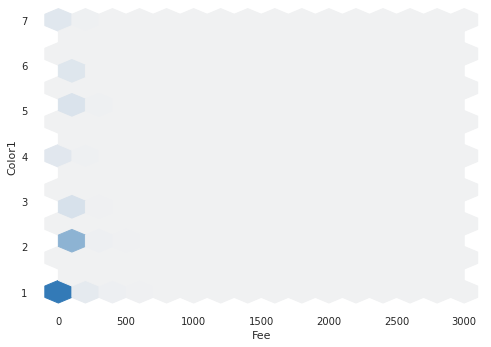

In [5]:
automatico = ProfileReport(df) #,minimal=True)
nombre_salida = 'EDA_MASCOTAS'
automatico.to_file(output_file=nombre_salida)

### 3.2. DTale

### 3.3. Crear un EDA Personal

## 4. DW

### 4.1. Obtenemos Info() para saber qué tipo ha asignado a cada columna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17981 entries, A. Sánchez to G. Malki
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number               17981 non-null  int64 
 1   Age                  17981 non-null  int64 
 2   Nationality          17981 non-null  object
 3   Overall              17981 non-null  int64 
 4   Potential            17981 non-null  int64 
 5   Club                 17981 non-null  object
 6   Club Country         17981 non-null  object
 7   Club Ligue           17981 non-null  object
 8   Value                17981 non-null  int64 
 9   Wage                 17981 non-null  int64 
 10  Special              17981 non-null  int64 
 11  Acceleration         17981 non-null  int64 
 12  Aggression           17981 non-null  int64 
 13  Agility              17981 non-null  int64 
 14  Balance              17981 non-null  int64 
 15  Ball control         17981 non-null  int64 
 1

#### 4.1.1. Si Pandas no reconoce correctamente el tipo de alguna columna, resolver.

#### 4.1.2. Eliminación de columnas irrelevantes o que no se podrá sacar información posteriormente

In [9]:
df = df.drop(["Number"],axis = 1)
df

Age     Nationality  Overall  Potential                Club  \
Name                                                                          
A. Sánchez       28           Chile       89         89             Arsenal   
M. Özil          28         Germany       88         88             Arsenal   
P. Čech          35  Czech Republic       86         86             Arsenal   
A. Lacazette     26          France       85         88             Arsenal   
S. Mustafi       25         Germany       84         86             Arsenal   
...             ...             ...      ...        ...                 ...   
J. Hernandez     21          Mexico       52         60      Real Salt Lake   
T. Hunter        23   United States       51         58      Houston Dynamo   
R. Diaz          25   United States       51         55  New York Red Bulls   
T. De Villardi   23          France       51         58   Minnesota Thunder   
G. Malki         25   United States       49         54      Houston Dynamo   

               Club Country     Club Ligue     Value  Wage  Special  \
Name                                                                  
A. Sánchez        Argentina  Primedivisiòn  67500000   265     2181   
M. Özil           Argentina  Primedivisiòn  60000000   265     1927   
P. Čech           Argentina  Primedivisiòn  10500000    92     1206   
A. Lacazette      Argentina  Primedivisiòn  48500000   180     2063   
S. Mustafi        Argentina  Primedivisiòn  31500000   145     1942   
...                     ...            ...       ...   ...      ...   
J. Hernandez     USA/Canada  Majleagsoccer     70000     1     1467   
T. Hunter        USA/Canada  Majleagsoccer     40000     1     1166   
R. Diaz          USA/Canada  Majleagsoccer     30000     1     1020   
T. De Villardi   USA/Canada  Majleagsoccer     50000     1     1428   
G. Malki         USA/Canada  Majleagsoccer     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78        

#### 4.1.3. Eliminación de filas duplicadas si es necesario y conveniente

In [10]:
# eliminar filas duplicadas
df=df.drop_duplicates(df.columns.to_list())
df

Age     Nationality  Overall  Potential                Club  \
Name                                                                          
A. Sánchez       28           Chile       89         89             Arsenal   
M. Özil          28         Germany       88         88             Arsenal   
P. Čech          35  Czech Republic       86         86             Arsenal   
A. Lacazette     26          France       85         88             Arsenal   
S. Mustafi       25         Germany       84         86             Arsenal   
...             ...             ...      ...        ...                 ...   
J. Hernandez     21          Mexico       52         60      Real Salt Lake   
T. Hunter        23   United States       51         58      Houston Dynamo   
R. Diaz          25   United States       51         55  New York Red Bulls   
T. De Villardi   23          France       51         58   Minnesota Thunder   
G. Malki         25   United States       49         54      Houston Dynamo   

               Club Country     Club Ligue     Value  Wage  Special  \
Name                                                                  
A. Sánchez        Argentina  Primedivisiòn  67500000   265     2181   
M. Özil           Argentina  Primedivisiòn  60000000   265     1927   
P. Čech           Argentina  Primedivisiòn  10500000    92     1206   
A. Lacazette      Argentina  Primedivisiòn  48500000   180     2063   
S. Mustafi        Argentina  Primedivisiòn  31500000   145     1942   
...                     ...            ...       ...   ...      ...   
J. Hernandez     USA/Canada  Majleagsoccer     70000     1     1467   
T. Hunter        USA/Canada  Majleagsoccer     40000     1     1166   
R. Diaz          USA/Canada  Majleagsoccer     30000     1     1020   
T. De Villardi   USA/Canada  Majleagsoccer     50000     1     1428   
G. Malki         USA/Canada  Majleagsoccer     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78        

### 4.2. Separamos columnas numéricas de categóricas en listas distintas. Separamos en otra lista las columnas temporales. Incluso las booleanas.

In [11]:
numericas= [x for x in df.dtypes.index if (df.dtypes[x]=='float64' or df.dtypes[x]=='int64')]
categoricas= [x for x in df.dtypes.index if (df.dtypes[x]=='O' or df.dtypes[x]=='object')]
fechas = [x for x in df.dtypes.index if (df.dtypes[x]=='datetime64')]
booleanas = [x for x in df.dtypes.index if (df.dtypes[x]=='bool')]
print("Numericas")
print(numericas)
print("Categoricas")
print(categoricas)
print("Fechas")
print(fechas)
print("Booleanas")
print(booleanas)

Numericas
['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']
Categoricas
['Nationality', 'Club', 'Club Country', 'Club Ligue', 'Preferred Positions']
Fechas
[]
Booleanas
[]


Para determinar si OneHot o LabelEncoding, buscar los valores únicos de las columnas categóricas y decidid: Maximo Label Encoding (hasta 5, siempre y cuando se "orienten" los valores por conocimiento del negocio)

In [12]:
df[categoricas].nunique()

Nationality            165
Club                   648
Club Country            30
Club Ligue              37
Preferred Positions    802
dtype: int64

In [13]:
print(categoricas)


['Nationality', 'Club', 'Club Country', 'Club Ligue', 'Preferred Positions']


In [14]:
# por tanto todas son one hot
df_num = pd.get_dummies(df, columns=categoricas, prefix=['Nac', 'Club', 'P_Club', 'L_Club', 'Pos'])

In [15]:
df_num

Age  Overall  Potential     Value  Wage  Special  \
Name                                                               
A. Sánchez       28       89         89  67500000   265     2181   
M. Özil          28       88         88  60000000   265     1927   
P. Čech          35       86         86  10500000    92     1206   
A. Lacazette     26       85         88  48500000   180     2063   
S. Mustafi       25       84         86  31500000   145     1942   
...             ...      ...        ...       ...   ...      ...   
J. Hernandez     21       52         60     70000     1     1467   
T. Hunter        23       51         58     40000     1     1166   
R. Diaz          25       51         55     30000     1     1020   
T. De Villardi   23       51         58     50000     1     1428   
G. Malki         25       49         54     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78         10           10          15   
M. Özil                         79          6           14          10   
P. Čech                         19         82           87          76   
A. Lacazette                    71         11            6           9   
S. Mustafi                      47         11            9          15   
...                            ...        ...          ...         ...   
J. Hernandez                    54         11            6           5   
T. Hunter                       30         14           15          14   
R. Diaz                         15         54           44          54   
T. De Villardi                  41         14            8          11   
G. Malki                        39         11           14           8   

                GK positioning  GK reflexes  Heading accuracy  Interceptions  \
Name                                                                           
A. Sánchez                  12           13                70             42   
M. Özil                      6           14           

In [16]:
df_num = df_num.reset_index()

In [17]:
df_num.drop(['Name','Overall','Potential'],axis = 1, inplace=True)

#### 4.2.1 (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

In [18]:
#! pip install sklearn

In [19]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
# Feature importances
prefijos = ['Nac', 'Club', 'P_Club', 'L_Club', 'Pos']

def F_importances(X,y):
    # Construye un arbol para así conocer la importancia de las columnas
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
    columnas = X.columns.to_list()
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, columnas[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])


#F_importances(df_num.drop(["Value"],axis = 1),df_num['Value'])

In [20]:
"""# ahora sin Overall y Potential
F_importances(df_num.drop(["Value","Overall","Potential"],axis = 1),df_num['Value'])"""

'# ahora sin Overall y Potential\nF_importances(df_num.drop(["Value","Overall","Potential"],axis = 1),df_num[\'Value\'])'

#### 4.2.2 (Opcional) En caso contrario hacer una matriz de correlación con el target

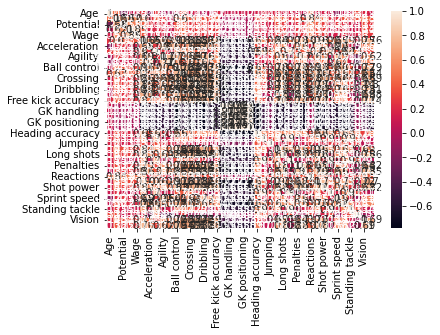

In [21]:
correlacion = df.corr()
sns.heatmap(correlacion, annot=True)
plt.show()

### 4.3. Determinamos si tenemos pocos datos. En ese caso, buscaríamos nuevos conjuntos de datos (scrapping, otras fuentes) y los unimos (merge, concat) con los que tenemos (por filas o por columnas)

#### 4.3.1 Convertimos la columna Preferred Positions en una serie de columnas One hot

In [22]:
df["Pref_pos_list"] = df["Preferred Positions"].str.split(" ")
positions = [f for f in df["Pref_pos_list"]]
positions = list(set([item for sublist in positions for item in sublist]))
positions.remove("")

for position in positions:
    print(position)
    df[position]=df['Pref_pos_list'].apply(lambda lista_posiciones: 1 if position in lista_posiciones else 0)

df

ST
LWB
LM
RB
RW
CF
CB
RWB
CM
GK
LB
CDM
RM
LW
CAM


c:\users\xhito\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\xhito\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Age     Nationality  Overall  Potential                Club  \
Name                                                                          
A. Sánchez       28           Chile       89         89             Arsenal   
M. Özil          28         Germany       88         88             Arsenal   
P. Čech          35  Czech Republic       86         86             Arsenal   
A. Lacazette     26          France       85         88             Arsenal   
S. Mustafi       25         Germany       84         86             Arsenal   
...             ...             ...      ...        ...                 ...   
J. Hernandez     21          Mexico       52         60      Real Salt Lake   
T. Hunter        23   United States       51         58      Houston Dynamo   
R. Diaz          25   United States       51         55  New York Red Bulls   
T. De Villardi   23          France       51         58   Minnesota Thunder   
G. Malki         25   United States       49         54      Houston Dynamo   

               Club Country     Club Ligue     Value  Wage  Special  \
Name                                                                  
A. Sánchez        Argentina  Primedivisiòn  67500000   265     2181   
M. Özil           Argentina  Primedivisiòn  60000000   265     1927   
P. Čech           Argentina  Primedivisiòn  10500000    92     1206   
A. Lacazette      Argentina  Primedivisiòn  48500000   180     2063   
S. Mustafi        Argentina  Primedivisiòn  31500000   145     1942   
...                     ...            ...       ...   ...      ...   
J. Hernandez     USA/Canada  Majleagsoccer     70000     1     1467   
T. Hunter        USA/Canada  Majleagsoccer     40000     1     1166   
R. Diaz          USA/Canada  Majleagsoccer     30000     1     1020   
T. De Villardi   USA/Canada  Majleagsoccer     50000     1     1428   
G. Malki         USA/Canada  Majleagsoccer     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78        

In [23]:
# hacemos que se quede una sola preferida y las one hot
df[['Preferida','Preferred Positions']]=df['Preferred Positions'].str.split(" ",n=1,expand=True)


c:\users\xhito\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
df = df.drop(['Pref_pos_list','Preferred Positions'],axis = 1)
df

Age     Nationality  Overall  Potential                Club  \
Name                                                                          
A. Sánchez       28           Chile       89         89             Arsenal   
M. Özil          28         Germany       88         88             Arsenal   
P. Čech          35  Czech Republic       86         86             Arsenal   
A. Lacazette     26          France       85         88             Arsenal   
S. Mustafi       25         Germany       84         86             Arsenal   
...             ...             ...      ...        ...                 ...   
J. Hernandez     21          Mexico       52         60      Real Salt Lake   
T. Hunter        23   United States       51         58      Houston Dynamo   
R. Diaz          25   United States       51         55  New York Red Bulls   
T. De Villardi   23          France       51         58   Minnesota Thunder   
G. Malki         25   United States       49         54      Houston Dynamo   

               Club Country     Club Ligue     Value  Wage  Special  \
Name                                                                  
A. Sánchez        Argentina  Primedivisiòn  67500000   265     2181   
M. Özil           Argentina  Primedivisiòn  60000000   265     1927   
P. Čech           Argentina  Primedivisiòn  10500000    92     1206   
A. Lacazette      Argentina  Primedivisiòn  48500000   180     2063   
S. Mustafi        Argentina  Primedivisiòn  31500000   145     1942   
...                     ...            ...       ...   ...      ...   
J. Hernandez     USA/Canada  Majleagsoccer     70000     1     1467   
T. Hunter        USA/Canada  Majleagsoccer     40000     1     1166   
R. Diaz          USA/Canada  Majleagsoccer     30000     1     1020   
T. De Villardi   USA/Canada  Majleagsoccer     50000     1     1428   
G. Malki         USA/Canada  Majleagsoccer     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78        

### 4.4. Extraemos información necesaria del EDA automático, DTale o del nuestro:
#### - Nulos por columna

In [25]:
df.isnull().sum()

Age                   0
Nationality           0
Overall               0
Potential             0
Club                  0
Club Country          0
Club Ligue            0
Value                 0
Wage                  0
Special               0
Acceleration          0
Aggression            0
Agility               0
Balance               0
Ball control          0
Composure             0
Crossing              0
Curve                 0
Dribbling             0
Finishing             0
Free kick accuracy    0
GK diving             0
GK handling           0
GK kicking            0
GK positioning        0
GK reflexes           0
Heading accuracy      0
Interceptions         0
Jumping               0
Long passing          0
Long shots            0
Marking               0
Penalties             0
Positioning           0
Reactions             0
Short passing         0
Shot power            0
Sliding tackle        0
Sprint speed          0
Stamina               0
Standing tackle       0
Strength        

#### - % valores únicos por filas y columnas

In [26]:
df.nunique()  # columnas
# df.nunique(axis=1)  # filas

Age                     29
Nationality            165
Overall                 49
Potential               48
Club                   648
Club Country            30
Club Ligue              37
Value                  207
Wage                   142
Special               1396
Acceleration            86
Aggression              85
Agility                 83
Balance                 83
Ball control            88
Composure               85
Crossing                87
Curve                   86
Dribbling               93
Finishing               92
Free kick accuracy      88
GK diving               76
GK handling             72
GK kicking              84
GK positioning          78
GK reflexes             75
Heading accuracy        91
Interceptions           89
Jumping                 74
Long passing            85
Long shots              89
Marking                 88
Penalties               87
Positioning             93
Reactions               67
Short passing           83
Shot power              88
S

#### - Número de elementos por categoría en cada una de las columnas categóricas

In [27]:
# como hemos hecho muchos cambios, vamos a volver a recalcular las 
# columnas numéricas y categóricas
numericas= [x for x in df.dtypes.index if (df.dtypes[x]=='float64' or df.dtypes[x]=='int64')]
categoricas= [x for x in df.dtypes.index if (df.dtypes[x]=='O' or df.dtypes[x]=='object')]

In [28]:
for col in categoricas:
    print('\nFrecuencia de categorias para la columna %s'%col)
    print(df[col].value_counts(normalize=True)*100)


Frecuencia de categorias para la columna Nationality
England       9.085839
Germany       6.330526
Spain         5.627754
France        5.426962
Argentina     5.360031
                ...   
San Marino    0.005578
Guatemala     0.005578
Swaziland     0.005578
Kyrgyzstan    0.005578
Belize        0.005578
Name: Nationality, Length: 165, dtype: float64

Frecuencia de categorias para la columna Club
Other                                1.383234
Arsenal                              0.184059
Borussia Dortmund                    0.184059
UD Las Palmas                        0.184059
Villarreal CF                        0.184059
                                       ...   
Associação Chapecoense de Futebol    0.111551
Vitória                              0.111551
Atlético Clube Goianiense            0.111551
Santos Futebol Clube                 0.111551
Universidad de Chile                 0.111551
Name: Club, Length: 648, dtype: float64

Frecuencia de categorias para la columna Club Countr

#### - Filas duplicadas

In [29]:
df.duplicated().sum()

0

#### - (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

### 4.5 Limpieza de nulos

En este caso no aplica por no haber nulos

#### - Estrategia: Eliminación "con violencia" de filas o columnas con nulos

#### - Estrategia: rellenado valor fijo (con 0s, etc)

#### - Estrategia: media, mediana, moda (valor más frecuente en categóricos)

#### - Estrategia: valores extremos de la distribución

#### - Estrategia: valores aleatorios dentro del rango de valores de la columna

#### - Estrategia: ML

### 4.6 Análisis y corrección de distribuciones

In [30]:
df_copia = df.copy()
# esto es por si no queremos a los porteros. Comentad la linea si no
#df= df[df['Preferida']!="GK"]

In [31]:
import pylab 
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()

##### Aquí podemos elegir la columna sobre la cual realizar el estudio, en cada una de las posibilidades se hagan 

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'ST', 'LWB', 'LM', 'RB', 'RW', 'CF', 'CB', 'RWB', 'CM', 'GK', 'LB', 'CDM', 'RM', 'LW', 'CAM']
Nombre de columna a estudiar y modificar su distribución:Age


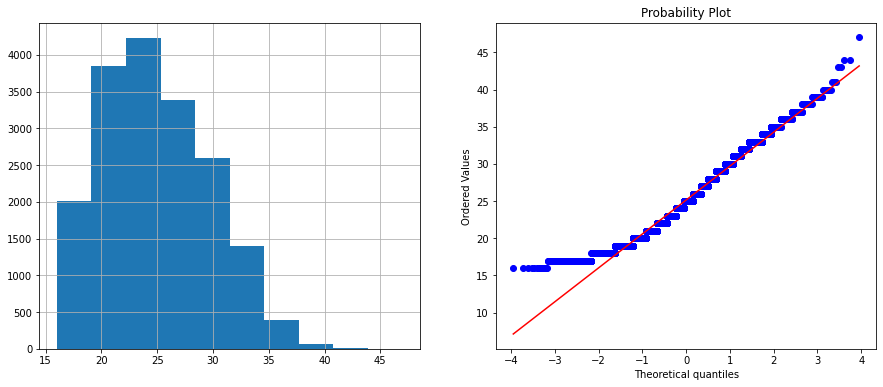

In [32]:
# mostramos histograma y Q-Q plot de las columnas numéricas que elijamos
correcto = False
while not(correcto):
    print(numericas)
    columna = input("Nombre de columna a estudiar y modificar su distribución:")
    if columna in numericas:
        correcto=True
        diagnostic_plots(df, columna)

In [33]:
# ahora que ya vemos como está, pasamos a corregir las que no nos gusten
# se elige la que más nos guste
# creamos una copia para evitar añadir al df si no queremos
df2 = df.copy()

In [34]:
print(columna)

Age


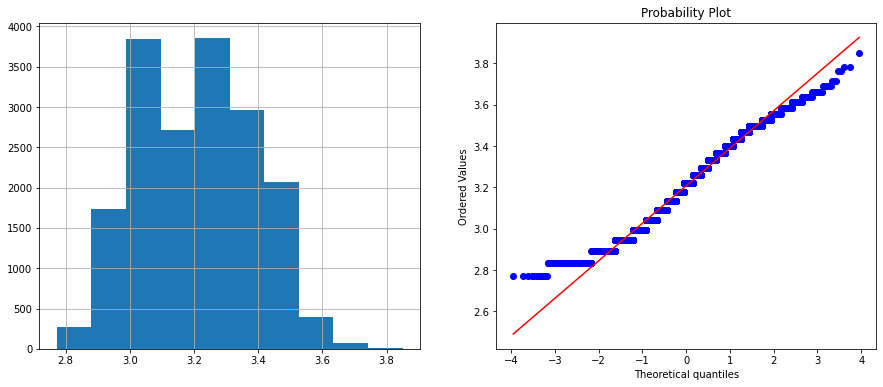

0.03779697988529509
-0.7500730313675179


In [35]:
# transformación Logaritmica
df2[columna+'_log'] = np.log(df[columna])
diagnostic_plots(df2, columna+'_log')
print(df2[columna+"_log"].skew())
print(df2[columna+"_log"].kurt())

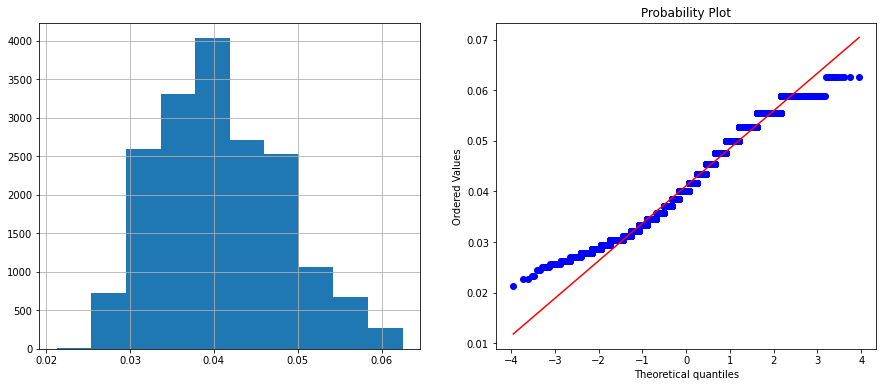

0.29825677872366513
-0.681980649298275


In [36]:
# Reciproca
df2[columna+'_reciprocal'] = 1 / df[columna]
diagnostic_plots(df2, columna+'_reciprocal')
print(df2[columna+"_reciprocal"].skew())
print(df2[columna+"_reciprocal"].kurt())

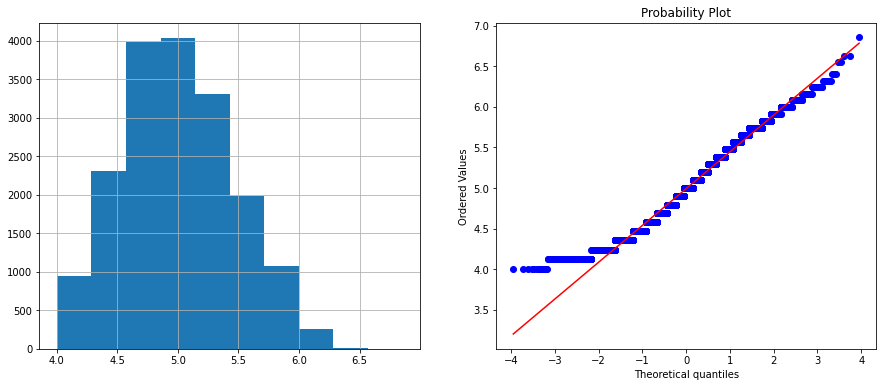

0.21115869988209557
-0.6584723716225342


In [37]:
# transformacion de raiz cuadrada
df2[columna+'_sqr']  =df[columna]**(1/2)
diagnostic_plots(df2, columna+'_sqr')
print(df2[columna+"_sqr"].skew())
print(df2[columna+"_sqr"].kurt())

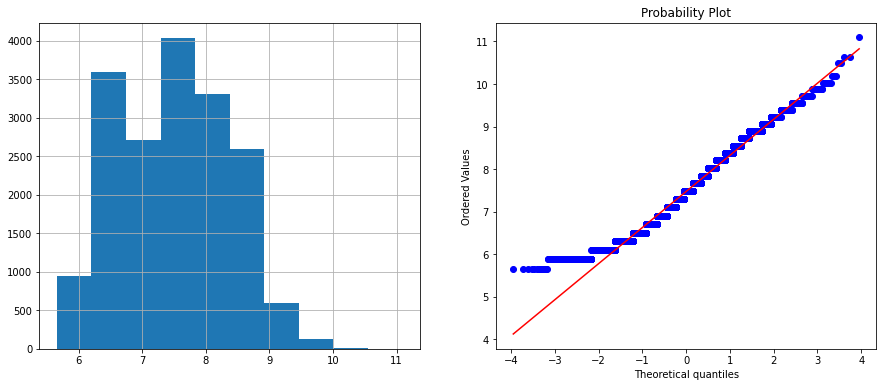

0.2552603160152401
-0.6208808403450217


In [38]:
# aurea
df2[columna+'_aur']  = df[columna]**(1/1.6)
diagnostic_plots(df2, columna+'_aur')
print(df2[columna+"_aur"].skew())
print(df2[columna+"_aur"].kurt())

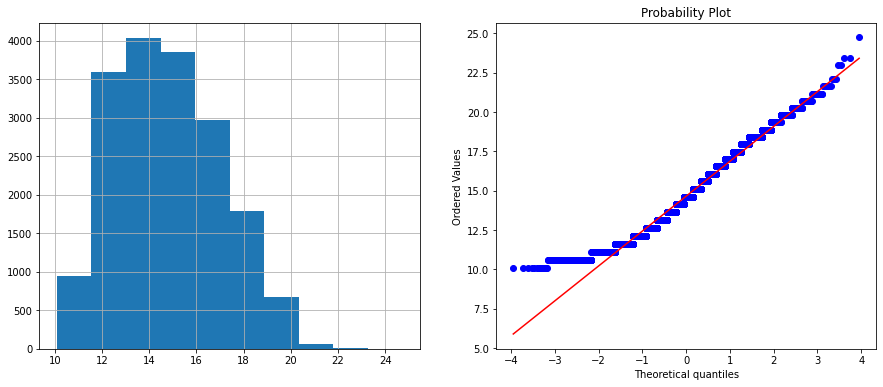

0.3295543872322898
-0.544081956045257


In [39]:
# exponencial
df2[columna+'_exp']  = df[columna]**(1/1.2)
diagnostic_plots(df2, columna+'_exp')
print(df2[columna+"_exp"].skew())
print(df2[columna+"_exp"].kurt())

Optimal λ:  -0.09746945981930093


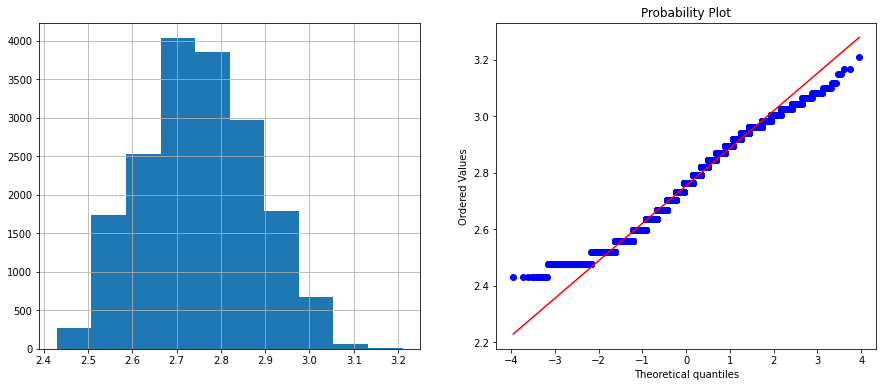

0.004494722533268505
-0.7576195118384494


In [40]:
# boxcox
df2[columna+'_boxcox'], param = stats.boxcox(df[columna]) # ponemos la , porque da dos resultados
print('Optimal λ: ', param)
diagnostic_plots(df2, columna+'_boxcox')
print(df2[columna+"_boxcox"].skew())
print(df2[columna+"_boxcox"].kurt())

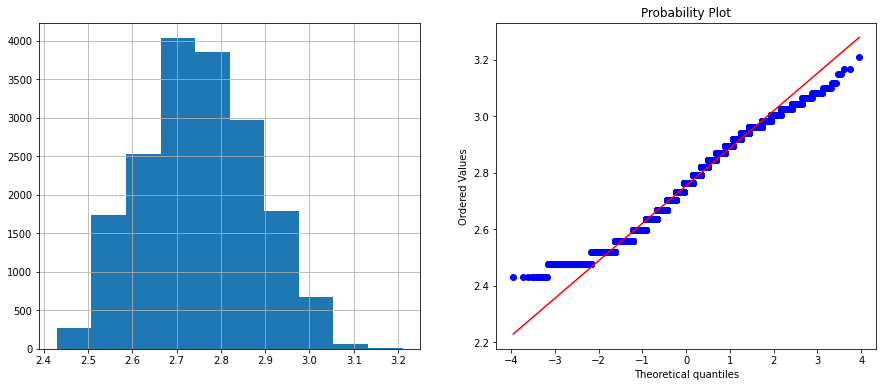

In [41]:
# una vez elegida la transformación, basta copiarla sin el df2,
# por ejemplo si hemos escogido la áurea
# boxcox
# boxcox
df[columna+'_boxcox'], param = stats.boxcox(df[columna]) # ponemos la , porque da dos resultados
diagnostic_plots(df, columna+'_boxcox')

In [42]:
df

Age     Nationality  Overall  Potential                Club  \
Name                                                                          
A. Sánchez       28           Chile       89         89             Arsenal   
M. Özil          28         Germany       88         88             Arsenal   
P. Čech          35  Czech Republic       86         86             Arsenal   
A. Lacazette     26          France       85         88             Arsenal   
S. Mustafi       25         Germany       84         86             Arsenal   
...             ...             ...      ...        ...                 ...   
J. Hernandez     21          Mexico       52         60      Real Salt Lake   
T. Hunter        23   United States       51         58      Houston Dynamo   
R. Diaz          25   United States       51         55  New York Red Bulls   
T. De Villardi   23          France       51         58   Minnesota Thunder   
G. Malki         25   United States       49         54      Houston Dynamo   

               Club Country     Club Ligue     Value  Wage  Special  \
Name                                                                  
A. Sánchez        Argentina  Primedivisiòn  67500000   265     2181   
M. Özil           Argentina  Primedivisiòn  60000000   265     1927   
P. Čech           Argentina  Primedivisiòn  10500000    92     1206   
A. Lacazette      Argentina  Primedivisiòn  48500000   180     2063   
S. Mustafi        Argentina  Primedivisiòn  31500000   145     1942   
...                     ...            ...       ...   ...      ...   
J. Hernandez     USA/Canada  Majleagsoccer     70000     1     1467   
T. Hunter        USA/Canada  Majleagsoccer     40000     1     1166   
R. Diaz          USA/Canada  Majleagsoccer     30000     1     1020   
T. De Villardi   USA/Canada  Majleagsoccer     50000     1     1428   
G. Malki         USA/Canada  Majleagsoccer     40000     1     1378   

                Acceleration  Aggression  Agility  Balance  Ball control  \
Name                                                                       
A. Sánchez                88          80       90       87            87   
M. Özil                   75          48       83       70            90   
P. Čech                   40          17       49       34            22   
A. Lacazette              84          70       87       84            84   
S. Mustafi                64          79       66       69            70   
...                      ...         ...      ...      ...           ...   
J. Hernandez              70          47       67       90            47   
T. Hunter                 54          42       34       62            29   
R. Diaz                   44          18       39       62            20   
T. De Villardi            55          58       65       57            49   
G. Malki                  56          58       54       68            48   

                Composure  Crossing  Curve  Dribbling  Finishing  \
Name                                                               
A. Sánchez             86        80     78         90         85   
M. Özil                78        82     84         86         74   
P. Čech                70        19     13         12         12   
A. Lacazette           86        64     74         85         87   
S. Mustafi             74        50     55         53         58   
...                   ...       ...    ...        ...        ...   
J. Hernandez           54        48     59         45         41   
T. Hunter              38        25     27         21         17   
R. Diaz                24        18     19         16         17   
T. De Villardi         38        43     35         52         39   
G. Malki               43        38     40         44         26   

                Free kick accuracy  GK diving  GK handling  GK kicking  \
Name                                                                     
A. Sánchez                      78        

##### Esto lo iremos repitiendo con todas las columnas numéricas y al final dejaremos esas columnas y no las originales cuando vayan al dataset

### 4.7 Tratamiento de outliers

#### 4.7.1. Detección de Outliers: Graficos Box-plot / Simetría y kurtosis

In [43]:
correcto = False
while not(correcto):
    print(numericas)
    print()
    columna = input("Nombre de columna a estudiar sus outliers:")
    if columna in numericas:
        correcto=True
        simetria = df[columna].skew()
        kurto = df[columna].kurt()
        print("Simetría: ",simetria)
        print("Kurtosis: ",kurto)
        if (-0.1<simetria<0.1) and (-0.1<kurto<0.1):
            print("Se recomienda factor 3")
            factor = 3
        else:
            print("Se recomienda factor 1.5")
            factor = 1.5

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'ST', 'LWB', 'LM', 'RB', 'RW', 'CF', 'CB', 'RWB', 'CM', 'GK', 'LB', 'CDM', 'RM', 'LW', 'CAM']

Nombre de columna a estudiar sus outliers:Age
Simetría:  0.38977196820384763
Kurtosis:  -0.46918087847073764
Se recomienda factor 1.5


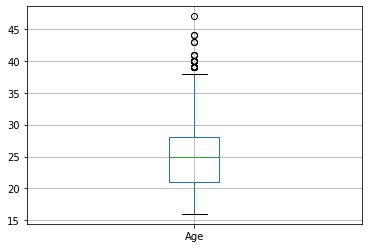

In [44]:
# como no son gaussianas, aplicaremos factor 1.5
fig = df.boxplot(column=columna)

In [45]:
# hallamos los valores superior e inferior para Age
IQR = df[columna].quantile(0.75) - df[columna].quantile(0.25)

Lower_fence = df[columna].quantile(0.25) - (IQR * factor)
Upper_fence = df[columna].quantile(0.75) + (IQR * factor)

Upper_fence, Lower_fence, IQR

(38.5, 10.5, 7.0)

In [46]:
# posibles outliers por encima
df[df[columna] > Upper_fence]

Age          Nationality  Overall  Potential  \
Name                                                          
S. Bertoli      39            Argentina       71         71   
C. Lucchetti    39            Argentina       69         69   
T. Simons       40              Belgium       73         73   
M. Candelo      40             Colombia       72         72   
B. Castillo     39             Colombia       68         68   
W. Díaz         39             Colombia       66         66   
J. Restrepo     39             Colombia       65         65   
M. Tyler        40              England       63         63   
M. Brown        40              England       61         61   
C. Day          41              England       57         57   
W. Brown        40              England       56         56   
D. Coyne        43                Wales       55         55   
J. Walker       43              England       55         55   
B. Richardson   47              England       46         46   
Hilton          39               Brazil       78         78   
B. Nivet        40               France       74         74   
A. Faivre       39               France       59         59   
G. Buffon       39                Italy       89         89   
M. Storari      40                Italy       76         76   
A. Bizzarri     39            Argentina       75         75   
A. Lucarelli    39                Italy       71         71   
B. Lobonţ       39              Romania       70         70   
F. Coppola      39                Italy       66         66   
S. Nakamura     39                Japan       71         71   
Y. Nakazawa     39                Japan       67         67   
O. Pérez        44               Mexico       71         71   
K. Wæhler       41               Norway       67         67   
F. Kippe        39               Norway       66         66   
L. Butrón       40                 Peru       66         66   
D. Vaca         39              Bolivia       63         63   
Quim            41             Portugal       69         69   
Paulo Lopes     39             Portugal       67         67   
D. Mulcahy      39  Republic of Ireland       55         55   
E. El Hadary    44                Egypt       70         70   
A. Al Basisi    39         Saudi Arabia       52         52   
A. Şahin        39               Turkey       70         70   

                                      Club Club Country        Club Ligue  \
Name                                                                        
S. Bertoli         Club Atlético Patronato    Argentina     Primedivisiòn   
C. Lucchetti              Atlético Tucumán    Argentina     Primedivisiòn   
T. Simons                   Club Brugge KV      Belgium           Pleague   
M. Candelo       Asociacion Deportivo Cali     Colombia         Lidimayor   
B. Castillo                 Atlético Huila     Colombia         Lidimayor   
W. Díaz               Jaguares Fútbol Club     Colombia         Lidimayor   
J. Restrepo                Águilas Doradas     Colombia         Lidimayor   
M. Tyler               Peterborough United      England       Footbaleag1   
M. Brown                         Port Vale      England       Footbaleag2   
C. Day                           Stevenage      England       Footbaleag2   
W. Brown                     Oxford United      England       Footbaleag1   
D. Coyne                        Shrewsbury      England       Footbaleag1   
J. Walker                     Lincoln City      England       Footbaleag2   
B. Richardson            Wycombe Wanderers      England       Footbaleag2   
Hilton              Montpellier Hérault SC       France              Lig1   
B. Nivet                      ES Troyes AC       France              Lig1   
A. Faivre      Bourg en Bresse Péronnas 01       France              Lig2   
G. Buffon                         Juventus        Italy              Sera   
M. Storari                           Milan        Italy              Sera   
A. 

In [47]:
# posibles outliers por debajo
df[df[columna] < Lower_fence]

Empty DataFrame
Columns: [Age, Nationality, Overall, Potential, Club, Club Country, Club Ligue, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys, ST, LWB, LM, RB, RW, CF, CB, RWB, CM, GK, LB, CDM, RM, LW, CAM, Preferida, Age_boxcox]
Index: []

#### 4.7.2. Tratamiento si es necesario

In [48]:
respuesta = input("¿Corregimos automáticamente los outliers de la columna "+ columna+"(S/N)?")
if respuesta.lower()=="s":
    df.loc[df[columna] > Upper_fence, columna] = Upper_fence
    df.loc[df[columna] < Lower_fence, columna] = Lower_fence

¿Corregimos automáticamente los outliers de la columna Age(S/N)?n


### 4.8 Agrupamiento de categorias con pocas filas asociadas (categorias raras)

In [49]:
for col in categoricas:
    print(col)
    print(df[col].value_counts() / len(df))

Nationality
England       0.090858
Germany       0.063305
Spain         0.056278
France        0.054270
Argentina     0.053600
                ...   
San Marino    0.000056
Guatemala     0.000056
Swaziland     0.000056
Kyrgyzstan    0.000056
Belize        0.000056
Name: Nationality, Length: 165, dtype: float64
Club
Other                                0.013832
Arsenal                              0.001841
Borussia Dortmund                    0.001841
UD Las Palmas                        0.001841
Villarreal CF                        0.001841
                                       ...   
Associação Chapecoense de Futebol    0.001116
Vitória                              0.001116
Atlético Clube Goianiense            0.001116
Santos Futebol Clube                 0.001116
Universidad de Chile                 0.001116
Name: Club, Length: 648, dtype: float64
Club Country
England        0.145072
Germany        0.084946
Spain          0.068046
Italy          0.064142
France         0.063528
Arge

En este caso, no ha lugar a agrupar categorías

### 4.9 Correlaciones multivariable (numéricas)

<AxesSubplot:>

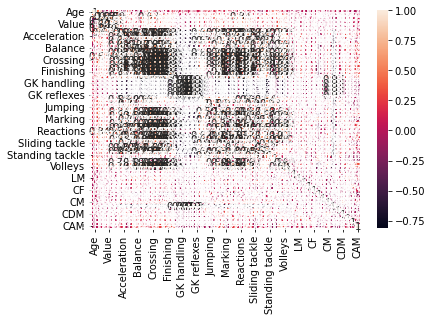

In [50]:
# En este punto, sólo podemos hacerlo con las columnas numéricas
df2=df[numericas]
# aplicamos
correlation_matrix = df2.corr().round(2)
# recordar que podemos introducir parámetros en la función .corr
# .corr(method='pearson', min_periods=1)*
# - method: aparte de pearson, puede ser además, kendall o spearman
# - min_periods: indica el número de periodos para que se considere una observación como válida

# annot=True te pone el valor de la correlacion
sns.heatmap(data=correlation_matrix, annot=True)

### 4.10 Seleccion de características / reducción de dimensionalidad

### 4.11 Ingeniería de características

Este apartado está muy ligado a los datos, por lo que se rellenará con lo que se estime en cada dataset. Sólo se presentan ciertos apartados para ser trabajados si son necesarios.

#### - Fechas

#### - Crear columnas

In [51]:
# volvemos a colocar el índice name como columna
df = df.reset_index()
df

Name  Age     Nationality  Overall  Potential  \
0          A. Sánchez   28           Chile       89         89   
1             M. Özil   28         Germany       88         88   
2             P. Čech   35  Czech Republic       86         86   
3        A. Lacazette   26          France       85         88   
4          S. Mustafi   25         Germany       84         86   
...               ...  ...             ...      ...        ...   
17924    J. Hernandez   21          Mexico       52         60   
17925       T. Hunter   23   United States       51         58   
17926         R. Diaz   25   United States       51         55   
17927  T. De Villardi   23          France       51         58   
17928        G. Malki   25   United States       49         54   

                     Club Club Country     Club Ligue     Value  Wage  \
0                 Arsenal    Argentina  Primedivisiòn  67500000   265   
1                 Arsenal    Argentina  Primedivisiòn  60000000   265   
2                 Arsenal    Argentina  Primedivisiòn  10500000    92   
3                 Arsenal    Argentina  Primedivisiòn  48500000   180   
4                 Arsenal    Argentina  Primedivisiòn  31500000   145   
...                   ...          ...            ...       ...   ...   
17924      Real Salt Lake   USA/Canada  Majleagsoccer     70000     1   
17925      Houston Dynamo   USA/Canada  Majleagsoccer     40000     1   
17926  New York Red Bulls   USA/Canada  Majleagsoccer     30000     1   
17927   Minnesota Thunder   USA/Canada  Majleagsoccer     50000     1   
17928      Houston Dynamo   USA/Canada  Majleagsoccer     40000     1   

       Special  Acceleration  Aggression  Agility  Balance  Ball control  \
0         2181            88          80       90       87            87   
1         1927            75          48       83       70            90   
2         1206            40          17       49       34            22   
3         2063            84          70       87       84            84   
4         1942            64          79       66       69            70   
...        ...           ...         ...      ...      ...           ...   
17924     1467            70          47       67       90            47   
17925     1166            54          42       34       62            29   
17926     1020            44          18       39       62            20   
17927     1428            55          58       65       57            49   
17928     1378            56          58       54       68            48   

       Composure  Crossing  Curve  Dribbling  Finishing  Free kick accuracy  \
0             86        80     78         90         85                  78   
1             78        82     84         86         74                  79   
2             70        19     13         12         12                  19   
3             86        64     74         85         87                  71   
4             74        50     55         53         58                  47   
...          ...       ...    ...        ...        ...                 ...   
17924         54        48     59         45         41                  54   
17925         38        25     27         21         17                  30   
17926         24        18     19         16         17                  15   
17927         38        43     35         52         39                  41   
17928         43        38     40         44         26                  39   

       GK diving  GK handling  GK kicking  GK positioning  GK reflexes  \
0             10           10          15              12           13   
1              6           14          10               6           14   
2             82           87          76              83           81   
3             11            6           9               5            6   
4             11            9          15              10            6   
...          ...          ...         ...

In [52]:
df['ValueWage']=df.apply(lambda dataframe: round(dataframe['Value']/dataframe['Wage'],2) if dataframe['Wage']!=0 else 0,axis=1)
media = df['ValueWage'].mean()
maximo = df['ValueWage'].max()
minimo = df['ValueWage'].min()
print("Media:",media)
print("Maximo:",maximo)
print("Minimo:",minimo)

Media: 259675.9931619164
Maximo: 21500000.0
Minimo: 0.0


In [53]:
df[df['ValueWage']==maximo]

Name  Age Nationality  Overall  Potential              Club  \
13533  Taison   29      Brazil       82         82  Shakhtar Donetsk   
13534  Marlos   29      Brazil       82         82  Shakhtar Donetsk   

      Club Country       Club Ligue     Value  Wage  Special  Acceleration  \
13533        Other  Clufrothleagues  21500000     1     2045            93   
13534        Other  Clufrothleagues  21500000     1     2060            85   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
13533          56       89       83            85         74        73     52   
13534          58       92       84            88         84        76     80   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
13533         87         76                  73          7            7   
13534         87         76                  72          6           13   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
13533          11              15           13                56   
13534          13               8            9                53   

       Interceptions  Jumping  Long passing  Long shots  Marking  Penalties  \
13533             49       62            75          83       38         72   
13534             51       68            73          78       45         74   

       Positioning  Reactions  Short passing  Shot power  Sliding tackle  \
13533           74         79             77          83              40   
13534           77         77             81          76              42   

       Sprint speed  Stamina  Standing tackle  Strength  Vision  Volleys  ST  \
13533            91       70               53        62      79       82   0   
13534            82       78               49        62      79       68   0   

       LWB  LM  RB  RW  CF  CB  RWB  CM  GK  LB  CDM  RM  LW  CAM Preferida  \
13533    0   1   0   0   0   0    0   0   0   0    0   0   0    1       CAM   
13534    0   0   0   0   0   0    0   0   0   0    0   1   0    0        RM   

       Age_boxcox   ValueWage  
13533    2.870511  21500000.0  
13534    2.870511  21500000.0

In [54]:
df['EsNacional']=df.apply(lambda dframe: 1 if dframe['Nationality']==dframe['Club Country'] else 0,axis=1)
df["Sopravalutato"] = df['ValueWage'].apply(lambda x: 1 if (x>=media) else 0)
df["CuantoValueWage"] = df['ValueWage']-media
dif=maximo - media
df["(ValueWage-mean)%"] = df["ValueWage"].apply(lambda columna:(columna-media)*100/dif)
# media = 50%
# si es positivo, lo que pasa sea un porcentaje respecto a maximo - media
# 7980.153238 me paso  210000000-265000 = 35000.
#                 maximo  media = 
df.sort_values("(ValueWage-mean)%",ascending=False)

Name  Age Nationality  Overall  Potential              Club  \
13534         Marlos   29      Brazil       82         82  Shakhtar Donetsk   
13533         Taison   29      Brazil       82         82  Shakhtar Donetsk   
13536           Fred   24      Brazil       80         85  Shakhtar Donetsk   
13539        Bernard   24      Brazil       79         84  Shakhtar Donetsk   
13538   Y. Rakitskyi   27     Ukraine       80         82  Shakhtar Donetsk   
...              ...  ...         ...      ...        ...               ...   
11921       A. Silva   33    Paraguay       72         72             Other   
12080        D. Böde   30     Hungary       68         68             Other   
12081       M. James   23      Canada       67         72             Other   
12222  A. Santamaria   25        Peru       63         66             Other   
11975        S. Saad   28       Egypt       70         71             Other   

      Club Country       Club Ligue     Value  Wage  Special  Acceleration  \
13534        Other  Clufrothleagues  21500000     1     2060            85   
13533        Other  Clufrothleagues  21500000     1     2045            93   
13536        Other  Clufrothleagues  19500000     1     2123            80   
13539        Other  Clufrothleagues  17000000     1     1921            94   
13538        Other  Clufrothleagues  14500000     1     2115            69   
...            ...              ...       ...   ...      ...           ...   
11921        Other            Other         0     0     1138            38   
12080        Other            Other         0     0     1751            65   
12081        Other            Other         0     0     1587            64   
12222        Other            Other         0     0     1692            63   
11975        Other            Other         0     0     1723            76   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
13534          58       92       84            88         84        76     80   
13533          56       89       83            85         74        73     52   
13536          73       84       87            84         79        67     70   
13539          41       92       96            84         71        77     73   
13538          82       72       73            77         78        68     75   
...           ...      ...      ...           ...        ...       ...    ...   
11921          24       45       31            25         27        19     16   
12080          68       59       69            65         80        67     55   
12081          75       47       60            58         55        34     44   
12222          46       56       65            64         59        61     59   
11975          58       70       67            46         63        41     50   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
13534         87         76                  72          6           13   
13533         87         76                  73          7            7   
13536         79         71                  59          7           16   
13539         81         71                  69          6           11   
13538         69         57                  77         12           16   
...          ...        ...                 ...        ...          ...   
11921         16         12                  12         71           70   
12080         58         70                  44          9           16   
12081         49         29                  22          6            8   
12222         64         55                  64         12           11   
11975         58         36                  49         14           13   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
13534          13               8            9                53   
13533          11              15           13                56   
13536          15              11           15      

#### - Agregaciones varias

In [55]:
datosCC = df.groupby("Club Country")['Value'].agg([np.sum, np.mean, np.std, np.max,np.min]).sort_values(by="mean",ascending=False).reset_index()
datosCC

Club Country         sum          mean           std       amax    amin
0         Spain  6440725000  5.279283e+06  9.511023e+06  105000000   50000
1         Italy  4531530000  3.940461e+06  7.350294e+06   79000000   30000
2        Greece   407535000  3.704864e+06  2.758365e+06   13500000  180000
3      Portugal  1750970000  3.632718e+06  4.708215e+06   27500000   50000
4       Germany  4897685000  3.215814e+06  6.804846e+06   92000000   20000
5        France  3536935000  3.105299e+06  6.628585e+06  123000000       0
6        Turkey  1460360000  2.938350e+06  3.521320e+06   21000000   50000
7       England  7070705000  2.718456e+06  6.759664e+06   90500000       0
8        Russia  1191170000  2.652940e+06  3.713331e+06   28000000   30000
9         Chile   655270000  2.259552e+06  2.245468e+06   14000000  140000
10       Brazil   719685000  2.249016e+06  2.044286e+06   10000000  140000
11    Argentina  1605025000  2.195657e+06  4.974982e+06   67500000   30000
12      Holland  1060865000  2.178368e+06  2.989345e+06   23000000  100000
13       Mexico   898475000  1.841137e+06  2.308110e+06   14500000   30000
14      Belgium   751550000  1.731682e+06  2.184085e+06   15000000       0
15   USA/Canada   954535000  1.459534e+06  2.350663e+06   25000000   30000
16        Other   804955000  1.257742e+06  2.637100e+06   21500000       0
17  Switzerland   287345000  1.105173e+06  1.952113e+06   14000000   30000
18     Colombia   564875000  1.021474e+06  1.393285e+06   12000000       0
19     Scotland   287655000  8.933385e+05  1.560521e+06   11000000   10000
20        Korea   287580000  8.558929e+05  1.147658e+06    8500000   30000
21    Sauarabia   348140000  8.388916e+05  1.531794e+06   10500000       0
22      Austria   187360000  7.262016e+05  1.091580e+06   10000000   30000
23      Denmark   263345000  7.234753e+05  1.026402e+06    7000000   20000
24       Poland   297075000  7.107057e+05  7.968054e+05    6000000   30000
25    Australia   153300000  6.753304e+05  1.028700e+06    7500000   50000
26       Sweden   239970000  6.629006e+05  8.048407e+05    6500000   10000
27        Japan   336210000  6.478035e+05  1.047330e+06   12000000   10000
28       Norway   232550000  5.917303e+05  6.601277e+05    5500000       0
29    Reireland    45810000  1.596167e+05  1.350959e+05     900000       0

In [56]:
df=pd.merge(df, datosCC, on='Club Country')
df

Name  Age     Nationality  Overall  Potential  \
0        A. Sánchez   28           Chile       89         89   
1           M. Özil   28         Germany       88         88   
2           P. Čech   35  Czech Republic       86         86   
3      A. Lacazette   26          France       85         88   
4        S. Mustafi   25         Germany       84         86   
...             ...  ...             ...      ...        ...   
17924     F. Gürden   18          Turkey       55         70   
17925      E. Selen   22          Turkey       55         65   
17926       I. Ünal   19          Turkey       53         66   
17927    A. Yiğiter   17          Turkey       53         72   
17928     M. Yıldız   21          Turkey       52         60   

                         Club Club Country     Club Ligue     Value  Wage  \
0                     Arsenal    Argentina  Primedivisiòn  67500000   265   
1                     Arsenal    Argentina  Primedivisiòn  60000000   265   
2                     Arsenal    Argentina  Primedivisiòn  10500000    92   
3                     Arsenal    Argentina  Primedivisiòn  48500000   180   
4                     Arsenal    Argentina  Primedivisiòn  31500000   145   
...                       ...          ...            ...       ...   ...   
17924  Evkur Yeni Malatyaspor       Turkey         Suplig    160000     1   
17925  Evkur Yeni Malatyaspor       Turkey         Suplig    110000     1   
17926              Alanyaspor       Turkey         Suplig     90000     1   
17927           Fenerbahçe SK       Turkey         Suplig    100000     2   
17928      Medicana Sivasspor       Turkey         Suplig     60000     1   

       Special  Acceleration  Aggression  Agility  Balance  Ball control  \
0         2181            88          80       90       87            87   
1         1927            75          48       83       70            90   
2         1206            40          17       49       34            22   
3         2063            84          70       87       84            84   
4         1942            64          79       66       69            70   
...        ...           ...         ...      ...      ...           ...   
17924     1479            56          64       53       64            54   
17925      945            31          25       60       43            10   
17926      825            26          19       25       46            14   
17927      802            17          24       32       38            10   
17928      985            48          19       41       55            19   

       Composure  Crossing  Curve  Dribbling  Finishing  Free kick accuracy  \
0             86        80     78         90         85                  78   
1             78        82     84         86         74                  79   
2             70        19     13         12         12                  19   
3             86        64     74         85         87                  71   
4             74        50     55         53         58                  47   
...          ...       ...    ...        ...        ...                 ...   
17924         49        43     48         53         36                  40   
17925         38        13     13         12         10                  13   
17926         27        13     10          5          7                  11   
17927         23        11     14          5          7                  11   
17928         11        12     12         14         12                  17   

       GK diving  GK handling  GK kicking  GK positioning  GK reflexes  \
0             10           10          15              12           13   
1              6           14          10               6           14   
2             82           87          76              83           81   
3             11            6           9               5            6   
4             11            9          15              10            6   
...          ..

In [57]:
df["Value_Ponderado_Pais"]= df["Value"] / (df["amax"] - df["amin"]) * 100

#(amax-amin) ---> 100
#value  -----> x
df.sort_values(by="Value_Ponderado_Pais",ascending=False)

Name  Age   Nationality  Overall  Potential  \
1656    Louri Beretta   25        Brazil       77         77   
1654   Formosandrinho   25        Brazil       77         77   
13640    K. Fortounis   24        Greece       78         82   
1975       Diogo Jota   20      Portugal       77         86   
731      B. Fornaroli   29       Uruguay       76         76   
...               ...  ...           ...      ...        ...   
12122         Marteli   31       Bolivia       66         66   
12120      M. Caicedo   25       Ecuador       66         69   
12118       J. Moreno   23     Venezuela       66         73   
12337      F. Cardozo   29         India       53         53   
11841   T. Hlatshwayo   27  South Africa       75         77   

                           Club Club Country                Club Ligue  \
1656   Fluminense Football Club       Brazil                  Librasil   
1654    São Paulo Futebol Clube       Brazil                  Librasil   
13640            Olympiakos CFP       Greece           Clufrothleagues   
1975    Wolverhampton Wanderers        Chile  Campeonanacionscotiabank   
731              Melbourne City    Australia                  A-League   
...                         ...          ...                       ...   
12122                     Other        Other                     Other   
12120                     Other        Other                     Other   
12118                     Other        Other                     Other   
12337                     Other        Other                     Other   
11841                     Other        Other                     Other   

          Value  Wage  Special  Acceleration  Aggression  Agility  Balance  \
1656   10000000    43     1865            84          65       55       55   
1654   10000000    35     1759            81          52       79       77   
13640  13500000     1     1963            73          63       81       64   
1975   14000000    45     1983            83          72       87       78   
731     7500000    18     1932            80          65       79       80   
...         ...   ...      ...           ...         ...      ...      ...   
12122         0     0     1393            55          78       47       64   
12120         0     0     1682            78          44       73       67   
12118         0     0     1737            65          71       54       74   
12337         0     0     1211            60          48       48       60   
11841         0     0     1481            58          78       49       33   

       Ball control  Composure  Crossing  Curve  Dribbling  Finishing  \
1656             69         79        56     59         73         74   
1654             73         78        57     61         72         76   
13640            79         75        73     78         80         72   
1975             82         80        61     74         84         73   
731              76         80        56     73         74         78   
...             ...        ...       ...    ...        ...        ...   
12122            32         40        23     30         38         20   
12120            65         61        57     63         70         62   
12118            61         66        60     54         60         51   
12337            28         41        24     29         29         24   
11841            34         71        39     31         31         21   

       Free kick accuracy  GK diving  GK handling  GK kicking  GK positioning  \
1656                   67          8           11          20              19   
1654                   55          8            9           8               8   
13640                  78         16           15          16              13   
1975                   55          7           12          15               9   
731                    72         16           16          15              15   
...                   ...        ...          ...         .

In [58]:
datosPre = df.groupby("Preferida")['Value'].agg([np.sum, np.mean, np.std, np.max,np.min]).sort_values(by="mean",ascending=False).reset_index()
datosPre

Preferida         sum          mean           std       amax  amin
0         LW  1704600000  4.020283e+06  1.021476e+07  123000000     0
1         RW  1447240000  3.397277e+06  8.453402e+06  105000000     0
2         CF   616160000  3.005659e+06  4.288446e+06   26000000     0
3        CDM  3867270000  2.790238e+06  6.168863e+06   79000000     0
4         ST  6301435000  2.774740e+06  6.794820e+06   97000000     0
5         LM  3630545000  2.752498e+06  5.422084e+06   65000000     0
6        CAM  3062210000  2.724386e+06  5.254034e+06   56000000     0
7         RM  3440730000  2.554365e+06  5.486368e+06   83000000     0
8         CM  4449695000  2.255294e+06  4.429445e+06   52500000     0
9         CB  6053475000  2.244522e+06  4.672953e+06   52000000     0
10       RWB   217255000  1.957252e+06  3.631839e+06   24000000     0
11       LWB   214485000  1.787375e+06  2.950834e+06   21000000     0
12        RB  2004430000  1.678752e+06  2.930648e+06   32000000     0
13        LB  2114090000  1.616277e+06  2.966400e+06   38000000     0
14        GK  3145570000  1.554135e+06  4.283319e+06   64500000     0

In [59]:
df=pd.merge(df, datosPre, on='Preferida')
df

Name  Age Nationality  Overall  Potential  \
0           A. Sánchez   28       Chile       89         89   
1            A. Ramsey   26       Wales       82         83   
2             J. Gómez   23   Argentina       76         82   
3      M. Pérez García   32   Argentina       75         75   
4        L. Pisculichi   33   Argentina       75         75   
...                ...  ...         ...      ...        ...   
17924       E. Larsson   25      Sweden       66         68   
17925      J. Blomberg   30      Sweden       65         65   
17926      H. Hauksson   25     Iceland       65         68   
17927        R. Taylor   22     Finland       60         67   
17928          A. Oğuz   24      Turkey       72         76   

                      Club Club Country     Club Ligue     Value  Wage  \
0                  Arsenal    Argentina  Primedivisiòn  67500000   265   
1                  Arsenal    Argentina  Primedivisiòn  25500000   130   
2      Club Atlético Lanús    Argentina  Primedivisiòn   9000000    16   
3      Club Atlético Tigre    Argentina  Primedivisiòn   5000000    14   
4       Argentinos Juniors    Argentina  Primedivisiòn   4000000    13   
...                    ...          ...            ...       ...   ...   
17924        GIF Sundsvall       Sweden    Allsvenskan    650000     1   
17925            AIK Solna       Sweden    Allsvenskan    500000     3   
17926            AIK Solna       Sweden    Allsvenskan    550000     3   
17927            AIK Solna       Sweden    Allsvenskan    290000     1   
17928    Gençlerbirliği SK       Turkey         Suplig   3400000    10   

       Special  Acceleration  Aggression  Agility  Balance  Ball control  \
0         2181            88          80       90       87            87   
1         2114            67          73       76       75            82   
2         1910            93          68       85       85            71   
3         1844            84          69       82       90            79   
4         1897            72          61       76       76            77   
...        ...           ...         ...      ...      ...           ...   
17924     1785            77          70       73       72            63   
17925     1814            71          75       72       76            66   
17926     1697            68          72       66       57            60   
17927     1670            67          60       53       62            63   
17928     1987            79          61       76       77            75   

       Composure  Crossing  Curve  Dribbling  Finishing  Free kick accuracy  \
0             86        80     78         90         85                  78   
1             81        75     70         81         72                  70   
2             69        64     57         72         52                  35   
3             76        73     79         75         59                  80   
4             76        80     80         76         64                  78   
...          ...       ...    ...        ...        ...                 ...   
17924         58        64     61         60         46                  62   
17925         62        69     66         65         62                  66   
17926         57        64     62         61         35                  42   
17927         62        58     61         59         58                  60   
17928         67        72     70         75         52                  63   

       GK diving  GK handling  GK kicking  GK positioning  GK reflexes  \
0             10           10          15              12           13   
1              6           11           5              10            8   
2             13           11          13               7            7   
3             16            9          15               9           14   
4             12           10           8               6           14   
...          ...          ...         ...             ...         

In [60]:
df["Value_Ponderado_Posicion"]= df["Value"] / (df["amax_y"] - df["amin_y"]) * 100

#(amax-amin) ---> 100
#value  -----> x
df.sort_values(by="Value_Ponderado_Posicion",ascending=False)

Name  Age     Nationality  Overall  Potential  \
1731        L. Messi   30       Argentina       93         93   
8402    Sergio Ramos   31           Spain       90         90   
5798       L. Suárez   30         Uruguay       92         92   
17511        D. Rose   26         England       82         83   
269     K. De Bruyne   26         Belgium       89         92   
...              ...  ...             ...      ...        ...   
7841   Feng Xiaoting   31        China PR       74         74   
7840    T. Sainsbury   25       Australia       74         77   
7839        T. Sivok   33  Czech Republic       74         74   
7836         G. Jara   31           Chile       75         75   
7870      R. McGowan   27       Australia       69         69   

                    Club Club Country   Club Ligue      Value  Wage  Special  \
1731        FC Barcelona        Spain  Lisantander  105000000   565     2154   
8402      Real Madrid CF        Spain  Lisantander   52000000   310     2153   
5798        FC Barcelona        Spain  Lisantander   97000000   510     2291   
17511  Tottenham Hotspur      England  Premileague   21000000    99     2117   
269      Manchester City      England  Premileague   83000000   285     2162   
...                  ...          ...          ...        ...   ...      ...   
7841               Other        Other        Other          0     0     1816   
7840               Other        Other        Other          0     0     1848   
7839               Other        Other        Other          0     0     1694   
7836               Other        Other        Other          0     0     1830   
7870               Other        Other        Other          0     0     1753   

       Acceleration  Aggression  Agility  Balance  Ball control  Composure  \
1731             92          48       90       95            95         96   
8402             75          84       79       60            84         80   
5798             88          78       86       60            91         83   
17511            80          87       73       76            76         73   
269              76          68       80       75            87         84   
...             ...         ...      ...      ...           ...        ...   
7841             66          65       53       63            68         66   
7840             73          64       67       60            62         70   
7839             46          73       50       55            59         66   
7836             67          90       73       72            69         75   
7870             64          80       57       61            63         61   

       Crossing  Curve  Dribbling  Finishing  Free kick accuracy  GK diving  \
1731         77     89         97         95                  90          6   
8402         66     73         61         60                  67         11   
5798         77     86         86         94                  84         27   
17511        81     64         79         57                  57         10   
269          90     83         85         83                  83         15   
...         ...    ...        ...        ...                 ...        ...   
7841         50     52         67         34                  52         11   
7840         61     62         58         46                  31         13   
7839         50     47         52         36                  43         10   
7836         59     28         63         45                  47         10   
7870         59     52         57         44                  55         12   

       GK handling  GK kicking  GK positioning  GK reflexes  Heading accuracy  \
1731            11          15              14            8                71   
8402             8           9               7           11                91   
5798            25          31              33           37                77   
17511           11           8              13           13     

In [61]:
# eliminamos columnas que han surgido
df.drop(['sum_x','mean_x','std_x','amax_x','amin_x','sum_y','mean_y','std_y','amax_y','amin_y'],axis=1,inplace=True)

In [62]:
df.head(3)

Name  Age Nationality  Overall  Potential                 Club  \
0  A. Sánchez   28       Chile       89         89              Arsenal   
1   A. Ramsey   26       Wales       82         83              Arsenal   
2    J. Gómez   23   Argentina       76         82  Club Atlético Lanús   

  Club Country     Club Ligue     Value  Wage  Special  Acceleration  \
0    Argentina  Primedivisiòn  67500000   265     2181            88   
1    Argentina  Primedivisiòn  25500000   130     2114            67   
2    Argentina  Primedivisiòn   9000000    16     1910            93   

   Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
0          80       90       87            87         86        80     78   
1          73       76       75            82         81        75     70   
2          68       85       85            71         69        64     57   

   Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
0         90         85                  78         10           10   
1         81         72                  70          6           11   
2         72         52                  35         13           11   

   GK kicking  GK positioning  GK reflexes  Heading accuracy  Interceptions  \
0          15              12           13                70             42   
1           5              10            8                58             69   
2          13               7            7                55             85   

   Jumping  Long passing  Long shots  Marking  Penalties  Positioning  \
0       85            73          82       30         77           86   
1       67            80          74       60         75           82   
2       81            64          56       66         45           60   

   Reactions  Short passing  Shot power  Sliding tackle  Sprint speed  \
0         87             81          84              35            84   
1         81             84          81              67            68   
2         74             72          64              71            92   

   Stamina  Standing tackle  Strength  Vision  Volleys  ST  LWB  LM  RB  RW  \
0       85               39        72      83       83   1    0   1   0   0   
1       89               70        69      80       79   0    0   0   0   0   
2       85               69        49      54       35   0    0   0   1   0   

   CF  CB  RWB  CM  GK  LB  CDM  RM  LW  CAM Preferida  Age_boxcox  ValueWage  \
0   0   0    0   0   0   0    0   1   1    0        RM    2.845195  254716.98   
1   0   0    0   1   0   0    1   1   0    0        RM    2.791444  196153.85   
2   0   0    0   0   0   0    0   1   0    0        RM    2.701664  562500.00   

   EsNacional  Sopravalutato  CuantoValueWage  (ValueWage-mean)%  \
0           0              0     -4959.013162          -0.023347   
1           0              0    -63522.143162          -0.299064   
2           1              1    302824.006838           1.425703   

   Value_Ponderado_Pais  Value_Ponderado_Posicion  
0            100.044464                 81.325301  
1             37.794575                 30.722892  
2             13.339262                 10.843373

In [63]:
df.to_csv("FIFA-18-full.csv",index=False)


In [64]:
df = pd.read_csv("FIFA-18-full.csv")
df

Name  Age Nationality  Overall  Potential  \
0           A. Sánchez   28       Chile       89         89   
1            A. Ramsey   26       Wales       82         83   
2             J. Gómez   23   Argentina       76         82   
3      M. Pérez García   32   Argentina       75         75   
4        L. Pisculichi   33   Argentina       75         75   
...                ...  ...         ...      ...        ...   
17924       E. Larsson   25      Sweden       66         68   
17925      J. Blomberg   30      Sweden       65         65   
17926      H. Hauksson   25     Iceland       65         68   
17927        R. Taylor   22     Finland       60         67   
17928          A. Oğuz   24      Turkey       72         76   

                      Club Club Country     Club Ligue     Value  Wage  \
0                  Arsenal    Argentina  Primedivisiòn  67500000   265   
1                  Arsenal    Argentina  Primedivisiòn  25500000   130   
2      Club Atlético Lanús    Argentina  Primedivisiòn   9000000    16   
3      Club Atlético Tigre    Argentina  Primedivisiòn   5000000    14   
4       Argentinos Juniors    Argentina  Primedivisiòn   4000000    13   
...                    ...          ...            ...       ...   ...   
17924        GIF Sundsvall       Sweden    Allsvenskan    650000     1   
17925            AIK Solna       Sweden    Allsvenskan    500000     3   
17926            AIK Solna       Sweden    Allsvenskan    550000     3   
17927            AIK Solna       Sweden    Allsvenskan    290000     1   
17928    Gençlerbirliği SK       Turkey         Suplig   3400000    10   

       Special  Acceleration  Aggression  Agility  Balance  Ball control  \
0         2181            88          80       90       87            87   
1         2114            67          73       76       75            82   
2         1910            93          68       85       85            71   
3         1844            84          69       82       90            79   
4         1897            72          61       76       76            77   
...        ...           ...         ...      ...      ...           ...   
17924     1785            77          70       73       72            63   
17925     1814            71          75       72       76            66   
17926     1697            68          72       66       57            60   
17927     1670            67          60       53       62            63   
17928     1987            79          61       76       77            75   

       Composure  Crossing  Curve  Dribbling  Finishing  Free kick accuracy  \
0             86        80     78         90         85                  78   
1             81        75     70         81         72                  70   
2             69        64     57         72         52                  35   
3             76        73     79         75         59                  80   
4             76        80     80         76         64                  78   
...          ...       ...    ...        ...        ...                 ...   
17924         58        64     61         60         46                  62   
17925         62        69     66         65         62                  66   
17926         57        64     62         61         35                  42   
17927         62        58     61         59         58                  60   
17928         67        72     70         75         52                  63   

       GK diving  GK handling  GK kicking  GK positioning  GK reflexes  \
0             10           10          15              12           13   
1              6           11           5              10            8   
2             13           11          13               7            7   
3             16            9          15               9           14   
4             12           10           8               6           14   
...          ...          ...         ...             ...         

In [69]:
# 
dataset_path = ".\carpeta\Ligas.xlsx"
df_ligas = pd.read_excel(dataset_path, sheet_name="Hoja1")
df_ligas

Club Country                Club Ligue  Clas_Ligue
0        Brazil                  Librasil           0
1       England               Premileague           0
2       Germany                Bundesliga           0
3         Italy                      Sera           0
4         Spain               Lisantander           0
5     Argentina             Primedivisiòn           1
6       Belgium                   Pleague           1
7      Colombia                 Lidimayor           1
8        France                      Lig1           1
9       Holland                Eredivisie           1
10     Portugal                     Linos           1
11       Russia     Sogfootbachampionship           1
12      England    Footbaleagchampionship           2
13      Germany                      Liga           2
14       Greece           Clufrothleagues           2
15        Italy                      Serb           2
16       Mexico                Libancommx           2
17     Scotland         Scottipremiership           2
18        Spain                   Li1|2|3           2
19       Turkey                    Suplig           2
20      Austria          Austribundesliga           3
21      Denmark               Alsuperliga           3
22      England               Footbaleag1           3
23       France                      Lig2           3
24        Korea             K Leagclassic           3
25    Reireland           Sairtricileague           3
26       Sweden               Allsvenskan           3
27  Switzerland         Raiffeissupleague           3
28    Australia                  A-League           4
29        Chile  Campeonanacionscotiabank           4
30      England               Footbaleag2           4
31        Japan                 Meiyasuj1           4
32       Norway               Eliteserien           4
33        Other                     Other           4
34       Poland               Ekstraklasa           4
35    Sauarabia          Abdlatjameleague           4
36   USA/Canada             Majleagsoccer           4

In [70]:
df=pd.merge(df, df_ligas, left_on='Club Ligue', right_on='Club Ligue')
df

Name  Age   Nationality  Overall  Potential  \
0           A. Sánchez   28         Chile       89         89   
1            A. Ramsey   26         Wales       82         83   
2             J. Gómez   23     Argentina       76         82   
3      M. Pérez García   32     Argentina       75         75   
4        L. Pisculichi   33     Argentina       75         75   
...                ...  ...           ...      ...        ...   
17924        U. Çiftçi   25        Turkey       68         71   
17925         D. Kadah   31        Turkey       73         73   
17926       L. Manyama   26  South Africa       69         70   
17927        M. Durmuş   20        Turkey       64         76   
17928          A. Oğuz   24        Turkey       72         76   

                      Club Club Country_x     Club Ligue     Value  Wage  \
0                  Arsenal      Argentina  Primedivisiòn  67500000   265   
1                  Arsenal      Argentina  Primedivisiòn  25500000   130   
2      Club Atlético Lanús      Argentina  Primedivisiòn   9000000    16   
3      Club Atlético Tigre      Argentina  Primedivisiòn   5000000    14   
4       Argentinos Juniors      Argentina  Primedivisiòn   4000000    13   
...                    ...            ...            ...       ...   ...   
17924    Gençlerbirliği SK         Turkey         Suplig    925000    10   
17925          Antalyaspor         Turkey         Suplig   3500000    19   
17926     Atiker Konyaspor         Turkey         Suplig   1200000    11   
17927              Göztepe         Turkey         Suplig    800000     4   
17928    Gençlerbirliği SK         Turkey         Suplig   3400000    10   

       Special  Acceleration  Aggression  Agility  Balance  Ball control  \
0         2181            88          80       90       87            87   
1         2114            67          73       76       75            82   
2         1910            93          68       85       85            71   
3         1844            84          69       82       90            79   
4         1897            72          61       76       76            77   
...        ...           ...         ...      ...      ...           ...   
17924     1763            78          57       65       68            69   
17925     1848            63          72       67       65            74   
17926     1684            75          55       46       65            71   
17927     1732            78          62       84       83            65   
17928     1987            79          61       76       77            75   

       Composure  Crossing  Curve  Dribbling  Finishing  Free kick accuracy  \
0             86        80     78         90         85                  78   
1             81        75     70         81         72                  70   
2             69        64     57         72         52                  35   
3             76        73     79         75         59                  80   
4             76        80     80         76         64                  78   
...          ...       ...    ...        ...        ...                 ...   
17924         52        71     50         71         34                  37   
17925         74        66     69         70         74                  60   
17926         65        40     21         69         73                  69   
17927         43        57     53         64         55                  57   
17928         67        72     70         75         52                  63   

       GK diving  GK handling  GK kicking  GK positioning  GK reflexes  \
0             10           10          15              12           13   
1              6           11           5              10            8   
2             13           11          13               7            7   
3             16            9          15               9           14   
4             12           10           8               6           14   
...          ...  

In [71]:
df=df.drop(['Club Country_y','Club Ligue'], axis=1)
df

Name  Age   Nationality  Overall  Potential  \
0           A. Sánchez   28         Chile       89         89   
1            A. Ramsey   26         Wales       82         83   
2             J. Gómez   23     Argentina       76         82   
3      M. Pérez García   32     Argentina       75         75   
4        L. Pisculichi   33     Argentina       75         75   
...                ...  ...           ...      ...        ...   
17924        U. Çiftçi   25        Turkey       68         71   
17925         D. Kadah   31        Turkey       73         73   
17926       L. Manyama   26  South Africa       69         70   
17927        M. Durmuş   20        Turkey       64         76   
17928          A. Oğuz   24        Turkey       72         76   

                      Club Club Country_x     Value  Wage  Special  \
0                  Arsenal      Argentina  67500000   265     2181   
1                  Arsenal      Argentina  25500000   130     2114   
2      Club Atlético Lanús      Argentina   9000000    16     1910   
3      Club Atlético Tigre      Argentina   5000000    14     1844   
4       Argentinos Juniors      Argentina   4000000    13     1897   
...                    ...            ...       ...   ...      ...   
17924    Gençlerbirliği SK         Turkey    925000    10     1763   
17925          Antalyaspor         Turkey   3500000    19     1848   
17926     Atiker Konyaspor         Turkey   1200000    11     1684   
17927              Göztepe         Turkey    800000     4     1732   
17928    Gençlerbirliği SK         Turkey   3400000    10     1987   

       Acceleration  Aggression  Agility  Balance  Ball control  Composure  \
0                88          80       90       87            87         86   
1                67          73       76       75            82         81   
2                93          68       85       85            71         69   
3                84          69       82       90            79         76   
4                72          61       76       76            77         76   
...             ...         ...      ...      ...           ...        ...   
17924            78          57       65       68            69         52   
17925            63          72       67       65            74         74   
17926            75          55       46       65            71         65   
17927            78          62       84       83            65         43   
17928            79          61       76       77            75         67   

       Crossing  Curve  Dribbling  Finishing  Free kick accuracy  GK diving  \
0            80     78         90         85                  78         10   
1            75     70         81         72                  70          6   
2            64     57         72         52                  35         13   
3            73     79         75         59                  80         16   
4            80     80         76         64                  78         12   
...         ...    ...        ...        ...                 ...        ...   
17924        71     50         71         34                  37          9   
17925        66     69         70         74                  60         13   
17926        40     21         69         73                  69          8   
17927        57     53         64         55                  57          8   
17928        72     70         75         52                  63          6   

       GK handling  GK kicking  GK positioning  GK reflexes  Heading accuracy  \
0               10          15              12           13                70   
1               11           5              10            8                58   
2               11          13               7            7                55   
3                9          15               9           14                45   
4               10           8               6           14                62   
...            ...      

In [73]:
# ahora vamos a meter lo de Niccolo y Lola
dfpaises = pd.read_csv(".\carpeta\List_countries_puntuada.csv")
dfpaises.drop(["Unnamed: 3"],axis=1,inplace=True)
dfpaises

Paese Continente Puntuacion_Pais
0     Northern Ireland     Europe               0
1          Afghanistan       Asia               0
2              Albania     Europe               0
3              Algeria     Africa               0
4               Angola     Africa               0
..                 ...        ...             ...
229              Wales     Europe               0
230     Western Sahara     Africa               0
231              Yemen       Asia               0
232             Zambia     Africa               0
233           Zimbabwe     Africa               0

[234 rows x 3 columns]

In [74]:
df = pd.merge(df, dfpaises, left_on="Club Country_x",right_on="Paese")
df

Name  Age   Nationality  Overall  Potential  \
0           A. Sánchez   28         Chile       89         89   
1            A. Ramsey   26         Wales       82         83   
2             J. Gómez   23     Argentina       76         82   
3      M. Pérez García   32     Argentina       75         75   
4        L. Pisculichi   33     Argentina       75         75   
...                ...  ...           ...      ...        ...   
15105        U. Çiftçi   25        Turkey       68         71   
15106         D. Kadah   31        Turkey       73         73   
15107       L. Manyama   26  South Africa       69         70   
15108        M. Durmuş   20        Turkey       64         76   
15109          A. Oğuz   24        Turkey       72         76   

                      Club Club Country_x     Value  Wage  Special  \
0                  Arsenal      Argentina  67500000   265     2181   
1                  Arsenal      Argentina  25500000   130     2114   
2      Club Atlético Lanús      Argentina   9000000    16     1910   
3      Club Atlético Tigre      Argentina   5000000    14     1844   
4       Argentinos Juniors      Argentina   4000000    13     1897   
...                    ...            ...       ...   ...      ...   
15105    Gençlerbirliği SK         Turkey    925000    10     1763   
15106          Antalyaspor         Turkey   3500000    19     1848   
15107     Atiker Konyaspor         Turkey   1200000    11     1684   
15108              Göztepe         Turkey    800000     4     1732   
15109    Gençlerbirliği SK         Turkey   3400000    10     1987   

       Acceleration  Aggression  Agility  Balance  Ball control  Composure  \
0                88          80       90       87            87         86   
1                67          73       76       75            82         81   
2                93          68       85       85            71         69   
3                84          69       82       90            79         76   
4                72          61       76       76            77         76   
...             ...         ...      ...      ...           ...        ...   
15105            78          57       65       68            69         52   
15106            63          72       67       65            74         74   
15107            75          55       46       65            71         65   
15108            78          62       84       83            65         43   
15109            79          61       76       77            75         67   

       Crossing  Curve  Dribbling  Finishing  Free kick accuracy  GK diving  \
0            80     78         90         85                  78         10   
1            75     70         81         72                  70          6   
2            64     57         72         52                  35         13   
3            73     79         75         59                  80         16   
4            80     80         76         64                  78         12   
...         ...    ...        ...        ...                 ...        ...   
15105        71     50         71         34                  37          9   
15106        66     69         70         74                  60         13   
15107        40     21         69         73                  69          8   
15108        57     53         64         55                  57          8   
15109        72     70         75         52                  63          6   

       GK handling  GK kicking  GK positioning  GK reflexes  Heading accuracy  \
0               10          15              12           13                70   
1               11           5              10            8                58   
2               11          13               7            7                55   
3                9          15               9           14                45   
4               10           8               6           14                62   
...            ...      

In [75]:
df = df.drop(['Paese','Club Country_x'],axis = 1)

In [76]:
df

Name  Age   Nationality  Overall  Potential  \
0           A. Sánchez   28         Chile       89         89   
1            A. Ramsey   26         Wales       82         83   
2             J. Gómez   23     Argentina       76         82   
3      M. Pérez García   32     Argentina       75         75   
4        L. Pisculichi   33     Argentina       75         75   
...                ...  ...           ...      ...        ...   
15105        U. Çiftçi   25        Turkey       68         71   
15106         D. Kadah   31        Turkey       73         73   
15107       L. Manyama   26  South Africa       69         70   
15108        M. Durmuş   20        Turkey       64         76   
15109          A. Oğuz   24        Turkey       72         76   

                      Club     Value  Wage  Special  Acceleration  Aggression  \
0                  Arsenal  67500000   265     2181            88          80   
1                  Arsenal  25500000   130     2114            67          73   
2      Club Atlético Lanús   9000000    16     1910            93          68   
3      Club Atlético Tigre   5000000    14     1844            84          69   
4       Argentinos Juniors   4000000    13     1897            72          61   
...                    ...       ...   ...      ...           ...         ...   
15105    Gençlerbirliği SK    925000    10     1763            78          57   
15106          Antalyaspor   3500000    19     1848            63          72   
15107     Atiker Konyaspor   1200000    11     1684            75          55   
15108              Göztepe    800000     4     1732            78          62   
15109    Gençlerbirliği SK   3400000    10     1987            79          61   

       Agility  Balance  Ball control  Composure  Crossing  Curve  Dribbling  \
0           90       87            87         86        80     78         90   
1           76       75            82         81        75     70         81   
2           85       85            71         69        64     57         72   
3           82       90            79         76        73     79         75   
4           76       76            77         76        80     80         76   
...        ...      ...           ...        ...       ...    ...        ...   
15105       65       68            69         52        71     50         71   
15106       67       65            74         74        66     69         70   
15107       46       65            71         65        40     21         69   
15108       84       83            65         43        57     53         64   
15109       76       77            75         67        72     70         75   

       Finishing  Free kick accuracy  GK diving  GK handling  GK kicking  \
0             85                  78         10           10          15   
1             72                  70          6           11           5   
2             52                  35         13           11          13   
3             59                  80         16            9          15   
4             64                  78         12           10           8   
...          ...                 ...        ...          ...         ...   
15105         34                  37          9           10          13   
15106         74                  60         13           11           6   
15107         73                  69          8           15          13   
15108         55                  57          8            7          16   
15109         52                  63          6            8          14   

       GK positioning  GK reflexes  Heading accuracy  Interceptions  Jumping  \
0                  12           13                70             42       85   
1                  10            8                58             69       67   
2                   7            7                55             85       81   
3                   9           14                45             43   

Eliminamos Name, Nationality y Club, y pasaremos a one_hot la de continente


In [77]:
df.drop(['Name','Nationality','Club'],axis=1,inplace=True)
df = pd.get_dummies(df, columns=["Continente"], prefix=["Cont"])
df

Age  Overall  Potential     Value  Wage  Special  Acceleration  \
0       28       89         89  67500000   265     2181            88   
1       26       82         83  25500000   130     2114            67   
2       23       76         82   9000000    16     1910            93   
3       32       75         75   5000000    14     1844            84   
4       33       75         75   4000000    13     1897            72   
...    ...      ...        ...       ...   ...      ...           ...   
15105   25       68         71    925000    10     1763            78   
15106   31       73         73   3500000    19     1848            63   
15107   26       69         70   1200000    11     1684            75   
15108   20       64         76    800000     4     1732            78   
15109   24       72         76   3400000    10     1987            79   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
0              80       90       87            87         86        80     78   
1              73       76       75            82         81        75     70   
2              68       85       85            71         69        64     57   
3              69       82       90            79         76        73     79   
4              61       76       76            77         76        80     80   
...           ...      ...      ...           ...        ...       ...    ...   
15105          57       65       68            69         52        71     50   
15106          72       67       65            74         74        66     69   
15107          55       46       65            71         65        40     21   
15108          62       84       83            65         43        57     53   
15109          61       76       77            75         67        72     70   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
0             90         85                  78         10           10   
1             81         72                  70          6           11   
2             72         52                  35         13           11   
3             75         59                  80         16            9   
4             76         64                  78         12           10   
...          ...        ...                 ...        ...          ...   
15105         71         34                  37          9           10   
15106         70         74                  60         13           11   
15107         69         73                  69          8           15   
15108         64         55                  57          8            7   
15109         75         52                  63          6            8   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
0              15              12           13                70   
1               5              10            8                58   
2              13               7            7                55   
3              15               9           14                45   
4               8               6           14                62   
...           ...             ...          ...               ...   
15105          13               7           15                55   
15106           6               7           16                78   
15107          13               9           15                73   
15108          16              12           11                59   
15109          14              10           15                64   

       Interceptions  Jumping  Long passing  Long shots  Marking  Penalties  \
0                 42       85            73          82       30         77   
1                 69       67            80          74       60         75   
2                 85       81            64          56       66         45   
3                 43       34            75          68       13         69   
4                 50       72            74 

Nos ha faltado por hacer, si el jugador cambió de equipo, etc
También la separación entre porteros y no porteros

#### - Label encoding dirigido a resultados

In [78]:
# vamos a darle más vidilla a las que son las preferidas
# En los one hot de posiciones a la columna cuya valor esté en Preferida, se le sumará 4
posiciones = ["RW","CB","CDM","LM","RM","GK","RB","ST","LB","LWB","CM","CF","LW","RWB","CAM"]
for posi in posiciones:
    print(posi)
    df[posi]=df.apply(lambda dfr: dfr[posi]+4 if dfr['Preferida']==posi else dfr[posi],axis=1)

# y ya nos cargamos la columna preferida
df.drop(['Preferida'],axis=1,inplace = True)
df

RW
CB
CDM
LM
RM
GK
RB
ST
LB
LWB
CM
CF
LW
RWB
CAM


Age  Overall  Potential     Value  Wage  Special  Acceleration  \
0       28       89         89  67500000   265     2181            88   
1       26       82         83  25500000   130     2114            67   
2       23       76         82   9000000    16     1910            93   
3       32       75         75   5000000    14     1844            84   
4       33       75         75   4000000    13     1897            72   
...    ...      ...        ...       ...   ...      ...           ...   
15105   25       68         71    925000    10     1763            78   
15106   31       73         73   3500000    19     1848            63   
15107   26       69         70   1200000    11     1684            75   
15108   20       64         76    800000     4     1732            78   
15109   24       72         76   3400000    10     1987            79   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
0              80       90       87            87         86        80     78   
1              73       76       75            82         81        75     70   
2              68       85       85            71         69        64     57   
3              69       82       90            79         76        73     79   
4              61       76       76            77         76        80     80   
...           ...      ...      ...           ...        ...       ...    ...   
15105          57       65       68            69         52        71     50   
15106          72       67       65            74         74        66     69   
15107          55       46       65            71         65        40     21   
15108          62       84       83            65         43        57     53   
15109          61       76       77            75         67        72     70   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
0             90         85                  78         10           10   
1             81         72                  70          6           11   
2             72         52                  35         13           11   
3             75         59                  80         16            9   
4             76         64                  78         12           10   
...          ...        ...                 ...        ...          ...   
15105         71         34                  37          9           10   
15106         70         74                  60         13           11   
15107         69         73                  69          8           15   
15108         64         55                  57          8            7   
15109         75         52                  63          6            8   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
0              15              12           13                70   
1               5              10            8                58   
2              13               7            7                55   
3              15               9           14                45   
4               8               6           14                62   
...           ...             ...          ...               ...   
15105          13               7           15                55   
15106           6               7           16                78   
15107          13               9           15                73   
15108          16              12           11                59   
15109          14              10           15                64   

       Interceptions  Jumping  Long passing  Long shots  Marking  Penalties  \
0                 42       85            73          82       30         77   
1                 69       67            80          74       60         75   
2                 85       81            64          56       66         45   
3                 43       34            75          68       13         69   
4                 50       72            74 

In [79]:
df['Puntuacion_Pais'] = df['Puntuacion_Pais'].astype("int64")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15110 entries, 0 to 15109
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15110 non-null  int64  
 1   Overall                   15110 non-null  int64  
 2   Potential                 15110 non-null  int64  
 3   Value                     15110 non-null  int64  
 4   Wage                      15110 non-null  int64  
 5   Special                   15110 non-null  int64  
 6   Acceleration              15110 non-null  int64  
 7   Aggression                15110 non-null  int64  
 8   Agility                   15110 non-null  int64  
 9   Balance                   15110 non-null  int64  
 10  Ball control              15110 non-null  int64  
 11  Composure                 15110 non-null  int64  
 12  Crossing                  15110 non-null  int64  
 13  Curve                     15110 non-null  int64  
 14  Dribbl

In [81]:
df.to_csv("FIFA_todo_numeros.csv",index=False)

#### - Creación de columnas que indican existencia de nulos o valores raros

#### - Expansión polinómica (Estricta / No estricta)

#### - Eliminación de columnas definitivamente

### 4.12 Conversión categóricas a numéricas

#### - Label Encoding

##### - One Hot

### 4.13 Separar Target de Características

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15110 entries, 0 to 15109
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15110 non-null  int64  
 1   Overall                   15110 non-null  int64  
 2   Potential                 15110 non-null  int64  
 3   Value                     15110 non-null  int64  
 4   Wage                      15110 non-null  int64  
 5   Special                   15110 non-null  int64  
 6   Acceleration              15110 non-null  int64  
 7   Aggression                15110 non-null  int64  
 8   Agility                   15110 non-null  int64  
 9   Balance                   15110 non-null  int64  
 10  Ball control              15110 non-null  int64  
 11  Composure                 15110 non-null  int64  
 12  Crossing                  15110 non-null  int64  
 13  Curve                     15110 non-null  int64  
 14  Dribbl

In [83]:
df

Age  Overall  Potential     Value  Wage  Special  Acceleration  \
0       28       89         89  67500000   265     2181            88   
1       26       82         83  25500000   130     2114            67   
2       23       76         82   9000000    16     1910            93   
3       32       75         75   5000000    14     1844            84   
4       33       75         75   4000000    13     1897            72   
...    ...      ...        ...       ...   ...      ...           ...   
15105   25       68         71    925000    10     1763            78   
15106   31       73         73   3500000    19     1848            63   
15107   26       69         70   1200000    11     1684            75   
15108   20       64         76    800000     4     1732            78   
15109   24       72         76   3400000    10     1987            79   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
0              80       90       87            87         86        80     78   
1              73       76       75            82         81        75     70   
2              68       85       85            71         69        64     57   
3              69       82       90            79         76        73     79   
4              61       76       76            77         76        80     80   
...           ...      ...      ...           ...        ...       ...    ...   
15105          57       65       68            69         52        71     50   
15106          72       67       65            74         74        66     69   
15107          55       46       65            71         65        40     21   
15108          62       84       83            65         43        57     53   
15109          61       76       77            75         67        72     70   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
0             90         85                  78         10           10   
1             81         72                  70          6           11   
2             72         52                  35         13           11   
3             75         59                  80         16            9   
4             76         64                  78         12           10   
...          ...        ...                 ...        ...          ...   
15105         71         34                  37          9           10   
15106         70         74                  60         13           11   
15107         69         73                  69          8           15   
15108         64         55                  57          8            7   
15109         75         52                  63          6            8   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
0              15              12           13                70   
1               5              10            8                58   
2              13               7            7                55   
3              15               9           14                45   
4               8               6           14                62   
...           ...             ...          ...               ...   
15105          13               7           15                55   
15106           6               7           16                78   
15107          13               9           15                73   
15108          16              12           11                59   
15109          14              10           15                64   

       Interceptions  Jumping  Long passing  Long shots  Marking  Penalties  \
0                 42       85            73          82       30         77   
1                 69       67            80          74       60         75   
2                 85       81            64          56       66         45   
3                 43       34            75          68       13         69   
4                 50       72            74 

In [84]:
df = df.sample(len(df))
df

Age  Overall  Potential     Value  Wage  Special  Acceleration  \
12982   30       83         83  19000000    40     1952            39   
10725   22       58         64    180000     1     1373            60   
14910   25       75         78   8500000    18     2040            81   
1323    25       71         74   3000000    17     1678            46   
2406    25       66         71    875000     1     1672            78   
...    ...      ...        ...       ...   ...      ...           ...   
7897    30       74         74   4100000    22     1966            68   
13329   22       77         84  12500000    27     1733            82   
1450    21       68         76   1100000     9     1838            71   
4517    31       63         63    325000     2     1741            71   
3247    30       74         74   3600000    36     1093            40   

       Aggression  Agility  Balance  Ball control  Composure  Crossing  Curve  \
12982          74       57       38            73         79        62     55   
10725          42       56       68            54         50        44     45   
14910          74       78       79            75         70        77     74   
1323           71       65       45            69         65        46     48   
2406           50       76       73            66         66        33     46   
...           ...      ...      ...           ...        ...       ...    ...   
7897           70       68       58            68         72        70     59   
13329          31       84       65            81         67        74     70   
1450           64       59       58            69         71        62     61   
4517           66       73       60            61         66        52     50   
3247           21       50       51            12         48        11     12   

       Dribbling  Finishing  Free kick accuracy  GK diving  GK handling  \
12982         62         58                  74         14            6   
10725         57         61                  30         10            8   
14910         77         60                  76         13           12   
1323          64         70                  35         11           16   
2406          65         64                  43         15            9   
...          ...        ...                 ...        ...          ...   
7897          67         66                  52          9            8   
13329         84         69                  65         15           10   
1450          64         52                  58         15           14   
4517          60         50                  51          6           13   
3247           8         12                  11         73           75   

       GK kicking  GK positioning  GK reflexes  Heading accuracy  \
12982          13              13           14                85   
10725           8               8            9                56   
14910          10              13            9                52   
1323           11              12            8                78   
2406           11              12           12                51   
...           ...             ...          ...               ...   
7897            8               6           16                58   
13329          11              12            7                23   
1450           10              13           11                65   
4517           14              13           11                61   
3247           80              76           71                14   

       Interceptions  Jumping  Long passing  Long shots  Marking  Penalties  \
12982             84       79            72          68       84         69   
10725             17       60            35          57       12         64   
14910             69       80            66          65       65         63   
1323              20       74            59          58       28         58   
2406              23       63            57 

In [85]:
target ="Value"

X = df.drop([target,'Overall','Potential'],axis = 1)
y = df[target]

In [86]:
# en crudo
target ="Value"

X = df_num.drop([target,],axis = 1)
y = df_num[target]

In [87]:
X

Age  Wage  Special  Acceleration  Aggression  Agility  Balance  \
0       28   265     2181            88          80       90       87   
1       28   265     1927            75          48       83       70   
2       35    92     1206            40          17       49       34   
3       26   180     2063            84          70       87       84   
4       25   145     1942            64          79       66       69   
...    ...   ...      ...           ...         ...      ...      ...   
17924   21     1     1467            70          47       67       90   
17925   23     1     1166            54          42       34       62   
17926   25     1     1020            44          18       39       62   
17927   23     1     1428            55          58       65       57   
17928   25     1     1378            56          58       54       68   

       Ball control  Composure  Crossing  Curve  Dribbling  Finishing  \
0                87         86        80     78         90         85   
1                90         78        82     84         86         74   
2                22         70        19     13         12         12   
3                84         86        64     74         85         87   
4                70         74        50     55         53         58   
...             ...        ...       ...    ...        ...        ...   
17924            47         54        48     59         45         41   
17925            29         38        25     27         21         17   
17926            20         24        18     19         16         17   
17927            49         38        43     35         52         39   
17928            48         43        38     40         44         26   

       Free kick accuracy  GK diving  GK handling  GK kicking  GK positioning  \
0                      78         10           10          15              12   
1                      79          6           14          10               6   
2                      19         82           87          76              83   
3                      71         11            6           9               5   
4                      47         11            9          15              10   
...                   ...        ...          ...         ...             ...   
17924                  54         11            6           5               8   
17925                  30         14           15          14               9   
17926                  15         54           44          54              43   
17927                  41         14            8          11               7   
17928                  39         11           14           8              11   

       GK reflexes  Heading accuracy  Interceptions  Jumping  Long passing  \
0               13                70             42       85            73   
1               14                54             24       52            84   
2               81                19             23       51            33   
3                6                72             40       76            59   
4                6                81             85       84            69   
...            ...               ...            ...      ...           ...   
17924            6                37             25       56            56   
17925           14                48             52       66            24   
17926           56                15             19       58            21   
17927            7                47             38       52            53   
17928           15                46             37       62            52   

       Long shots  Marking  Penalties  Positioning  Reactions  Short passing  \
0              82       30         77           86         87             81   
1              76       22         67           83         87             89   
2              11       11         23           13         84             35   
3              76      

### 4.14 Volver a aplicar Correlaciones y Feature Importances (sin estandarizado)

### 4.15 Aplicar Estandarización

In [88]:
def estandarizar(dataframe):
    media = dataframe.mean()
    desviacion_estandar = dataframe.std()
    return (dataframe - media)/desviacion_estandar

X = estandarizar(X)
X

Age       Wage   Special  Acceleration  Aggression   Agility  \
0      0.618013  10.994658  2.162158      1.570782    1.385693  1.803947   
1      0.618013  10.994658  1.227761      0.698862   -0.446551  1.330712   
2      2.133499   3.491809 -1.424603     -1.648615   -2.221538 -0.967857   
3      0.185018   7.308287  1.728068      1.302499    0.813116  1.601132   
4     -0.031480   5.790370  1.282942     -0.038917    1.328435  0.181427   
...         ...        ...       ...           ...         ...       ...   
17924 -0.897472  -0.454777 -0.464454      0.363508   -0.503809  0.249032   
17925 -0.464476  -0.454777 -1.571752     -0.709624   -0.790097 -1.981931   
17926 -0.031480  -0.454777 -2.108846     -1.380332   -2.164280 -1.643907   
17927 -0.464476  -0.454777 -0.607925     -0.642554    0.126025  0.113822   
17928 -0.031480  -0.454777 -0.791861     -0.575483    0.126025 -0.629832   

        Balance  Ball control  Composure  Crossing     Curve  Dribbling  \
0      1.646042      1.723528   2.178638  1.640420  1.666210   1.842816   
1      0.439819      1.902267   1.559256  1.748848  1.991531   1.632031   
2     -2.114536     -2.149146   0.939873 -1.666645 -1.858096  -2.267503   
3      1.433179      1.544789   2.178638  0.772993  1.449330   1.579334   
4      0.368864      0.710675   1.249564  0.013994  0.419148  -0.106951   
...         ...           ...        ...       ...       ...        ...   
17924  1.858905     -0.659656  -0.298891 -0.094434  0.636028  -0.528522   
17925 -0.127816     -1.732088  -1.537655 -1.341360 -1.099015  -1.793235   
17926 -0.127816     -2.268305  -2.621574 -1.720860 -1.532775  -2.056717   
17927 -0.482587     -0.540496  -1.537655 -0.365505 -0.665254  -0.159647   
17928  0.297910     -0.600076  -1.150542 -0.636576 -0.394153  -0.581218   

       Finishing  Free kick accuracy  GK diving  GK handling  GK kicking  \
0       2.041594            1.984374  -0.378729    -0.382862   -0.083614   
1       1.476449            2.041304  -0.603653    -0.147663   -0.384836   
2      -1.708916           -1.374470   3.669901     4.144718    3.591293   
3       2.144348            1.585867  -0.322498    -0.618061   -0.445081   
4       0.654419            0.219558  -0.322498    -0.441662   -0.083614   
...          ...                 ...        ...          ...         ...   
17924  -0.218987            0.618065  -0.322498    -0.618061   -0.686058   
17925  -1.452031           -0.748245  -0.153805    -0.088864   -0.143859   
17926  -1.452031           -1.602188   2.095434     1.616329    2.265917   
17927  -0.321741           -0.122020  -0.153805    -0.500462   -0.324592   
17928  -0.989640           -0.235879  -0.322498    -0.147663   -0.505325   

       GK positioning  GK reflexes  Heading accuracy  Interceptions   Jumping  \
0           -0.262833    -0.213973          1.015563      -0.219562  1.691712   
1           -0.613296    -0.158651          0.096166      -1.090390 -1.084238   
2            3.884312     3.547883         -1.915015      -1.138769 -1.168358   
3           -0.671706    -0.601223          1.130487      -0.316321  0.934635   
4           -0.379654    -0.601223          1.647648       1.860749  1.607592   
...               ...          ...               ...            ...       ...   
17924       -0.496475    -0.601223         -0.880694      -1.042011 -0.747759   
17925       -0.438064    -0.158651         -0.248608       0.264231  0.093438   
17926        1.547893     2.164848         -2.144864      -1.332287 -0.579520   
17927       -0.554885    -0.545901         -0.306070      -0.413079 -1.084238   
17928       -0.321243    -0.103330         -0.363533      -0.461459 -0.243041   

       Long passing  Long shots   Marking  Penalties  Positioning  Reactions  \
0          1.325298    1.807482 -0.653455   1.774290     1.874039   2.745219   
1          2.033647    1.496061 -1.024345   1.141454     1.719526   2.745219   
2         -1.250519   -1.877658 -1.534320  -1.643021    -1.885768   2.41

### 4.16 (Opcional) Aplicar Feature Importances (con estandarizado)

Feature ranking:
1. feature Wage (0.371156)
2. feature Reactions (0.173961)
3. feature Ball control (0.098023)
4. feature Dribbling (0.040893)
5. feature Short passing (0.033892)
6. feature Age (0.026636)
7. feature Composure (0.025392)
8. feature Special (0.022117)
9. feature Positioning (0.020352)
10. feature Vision (0.010996)
11. feature Standing tackle (0.010715)
12. feature Finishing (0.010527)
13. feature Sliding tackle (0.006997)
14. feature Long shots (0.006396)
15. feature Marking (0.006164)
16. feature Interceptions (0.006111)
17. feature Pos_LW  (0.004422)
18. feature GK reflexes (0.004298)
19. feature Volleys (0.004196)
20. feature GK handling (0.004045)
21. feature Acceleration (0.003462)
22. feature Curve (0.003373)
23. feature GK diving (0.003338)
24. feature L_Club_Lisantander (0.003220)
25. feature Sprint speed (0.003158)
26. feature Heading accuracy (0.003145)
27. feature GK positioning (0.003076)
28. feature Shot power (0.002970)
29. feature Long passing (0.002839)
3

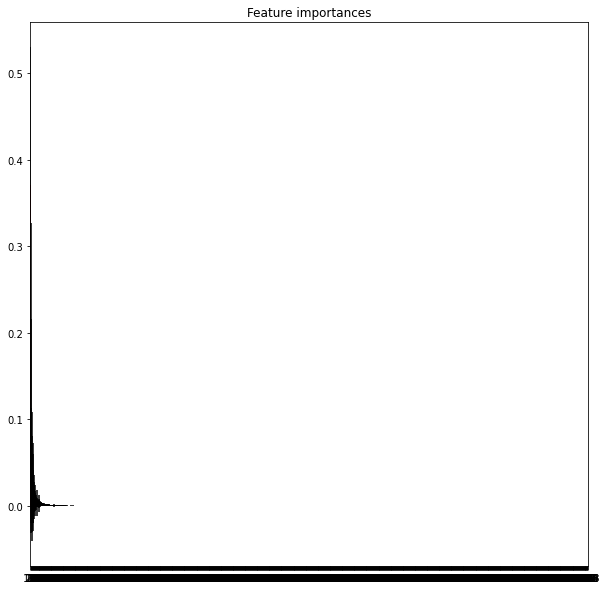

In [89]:
F_importances(X,y)

# (Opcional) Un vistazo a cómo se comportaría el Dataset

In [90]:
# cargamos algunas librerías de algoritmos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# métricas clasificacion
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split


# cargamos algunas librerías de algoritmos de regresion
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# métricas regresion
from sklearn.metrics import r2_score

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # los datos (features) nuestra X
    y,  # columna objetivo, nuestra y
    test_size=0.1,  # el 80% de las filas serán para entrenar y el 20% para probar si ha ido bien
    random_state=0) 

X_train.shape, X_test.shape

((16136, 1719), (1793, 1719))

In [93]:
# clasificacion

# Aquí deshabilitamos el modelo que necesitemos
# modelo = LogisticRegression(random_state=44)
# modelo = AdaBoostClassifier(n_estimators=200, n_jobs=-1)
# modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Entrenamos modelo
modelo.fit(X_train, y_train)

# predicción sobre el conjunto de test
y_pred = modelo.predict(X_test)

# calculamos su acierto
print('Accuracy: {}'.format(modelo.score(X_test, y_test)))
print('roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.1249302844394869


ValueError: multi_class must be in ('ovo', 'ovr')

In [94]:
# regresion

# Aquí deshabilitamos el modelo que necesitemos
#modelo = SVR(C=1.0)
#modelo = KNeighborsRegressor(n_jobs=-1)
modelo = RandomForestRegressor(n_estimators = 200,n_jobs=-1)

# Entrenamos modelo
modelo.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [95]:
# predicción sobre el conjunto de test
y_pred = modelo.predict(X_test)

# calculamos su acierto
print('Accuracy: {}'.format(modelo.score(X_test, y_test)))
print('Accuracy Train: {}'.format(modelo.score(X_train, y_train)))
print('r2: {}'.format(r2_score(y_test, y_pred)))

Accuracy: 0.9240650472414473
Accuracy Train: 0.986651414883236
r2: 0.9240650472414473


In [ ]:
Con Overall y Potential
Accuracy: 0.9860998320022375
r2: 0.9860998320022375
    
Sin Overall y Potential
Accuracy: 0.9702686159898298
r2: 0.9702686159898298